In [2]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
import catboost as ctb
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import math
from sklearn.ensemble import RandomForestRegressor

# Import files

In [4]:
# Import files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Concatenate 2 files
df = pd.concat((train, test), axis=0, sort=False)
df.head()

,stt,tinh,quan_huyen,xa_phuong,duong_pho,kc_duong_chinh,min_dorong_ngo,dien_tich,mat_tien,so_mattien,thoi_diem_hieu_luc,district,ward,REF_TINH_CODE,REF_HUYEN_CODE,REF_XA_CODE,don_gia1,Unnamed: 0
0,1,Thành phố Hà Nội,Huyện Thạch Thất,Xã Chàng Sơn,Đường liên thôn,0.0,3.2,79.0,6.90,2,2021-06-22 00:00:00,thạch thất,thạch thất_chàng sơn,148873,152286,152355,0.036500,NaN
1,2,Thành phố Hà Nội,Huyện Thạch Thất,Xã Thạch Xá,Đường liên thôn,0.0,6.0,108.0,5.20,1,2021-06-14 00:00:00,thạch thất,thạch thất_thạch xá,148873,152286,152357,0.050000,NaN
2,3,Thành phố Hà Nội,Huyện Thanh Oai,Xã Bích Hòa,Đường 21B,300.0,2.5,106.0,4.00,1,2021-06-25 00:00:00,thanh oai,thanh oai_bích hòa,148873,152384,195441,0.022078,NaN
3,4,Thành phố Hà Nội,Huyện Thanh Trì,Xã Tam Hiệp,"Đường Phan Trọng Tuệ (đoạn qua xã Tam Hiệp, Th...",800.0,3.5,40.1,5.36,1,2021-06-23 00:00:00,thanh trì,thanh trì_tam hiệp,148873,152474,195383,0.049900,NaN
4,5,Thành phố Hà Nội,Huyện Thường Tín,Xã Vạn Điểm,Cao tốc Pháp Vân,350.0,2.8,179.5,11.20,1,2021-06-20 00:00:00,thường tín,thường tín_vạn điểm,148873,152587,152661,0.010523,NaN


# Visualization

## Functions to draw bar and line graph

In [3]:
def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'
    
    if typ == 'line':
        line1 = ax.lines[0]
       
        for x_value, y_value in zip(line1.get_xdata(), line1.get_ydata()):
            label = "{:.2f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)

def plot(df,var1,var2):
    plt.figure()
    plt.rcParams.update({'font.size': 14}) 
    ax=train.groupby(var1).agg({var2:['mean']}).plot(kind='line',marker='o',rot=20,secondary_y=True,legend=False)
    ax2=train.groupby(var1).agg({'stt':'nunique'}).plot(kind='bar',color='lightsteelblue',use_index=True,figsize = (20,10),ax=ax,legend=False)
    add_value_labels(ax, typ='line')
    ax.legend(bbox_to_anchor=(1.25, 0.7))
    plt.show()

## District vs don_gia

<Figure size 432x288 with 0 Axes>

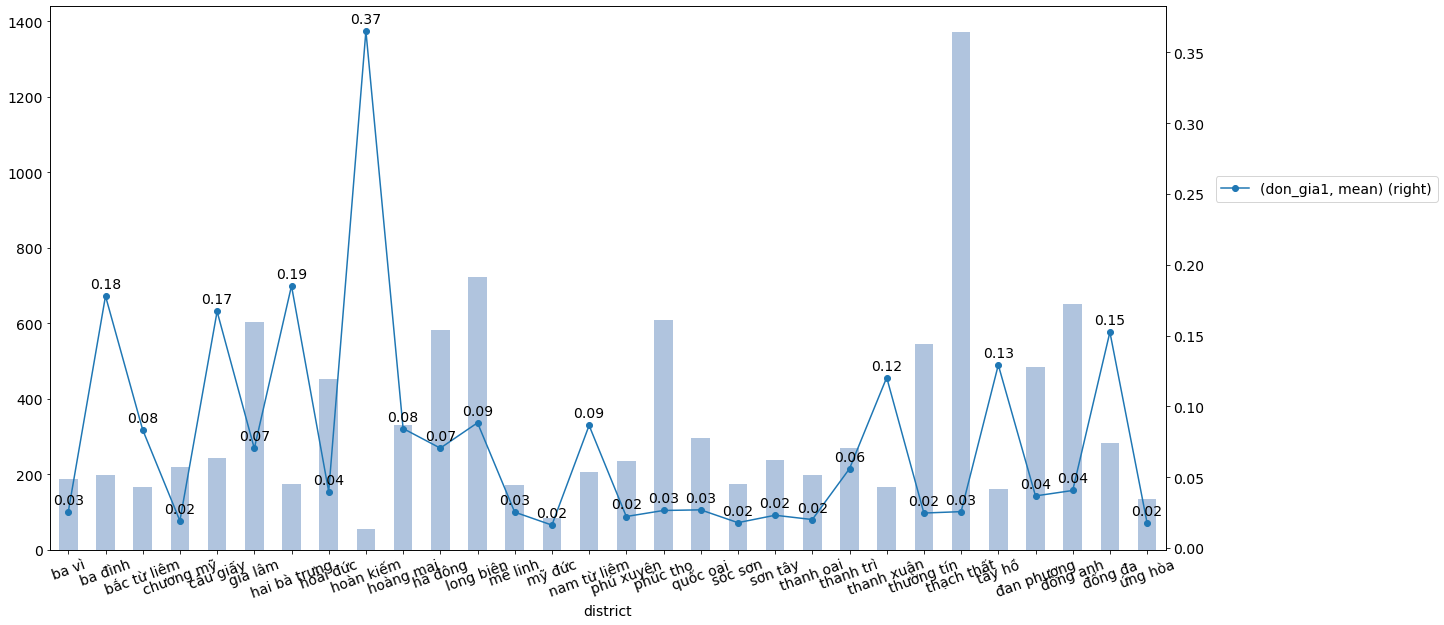

In [4]:
# Plot count(district) and avg price by district
plot(train,var1='district',var2='don_gia1')

## Kc_duong_chinh vs don_gia

In [5]:
# Divide variables into quatiles
for i in range(1,101):
    print(i,train['kc_duong_chinh'].quantile(i/100))

1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 10.0
24 20.0
25 20.0
26 30.0
27 30.0
28 40.0
29 45.0
30 50.0
31 50.0
32 50.0
33 50.0
34 60.0
35 69.89999999999964
36 70.0
37 80.0
38 80.0
39 90.0
40 100.0
41 100.0
42 100.0
43 100.0
44 100.0
45 100.0
46 100.0
47 100.0
48 110.0
49 120.0
50 120.0
51 130.0
52 140.0
53 150.0
54 150.0
55 150.0
56 150.0
57 160.0
58 177.0
59 185.0
60 200.0
61 200.0
62 200.0
63 200.0
64 200.0
65 200.0
66 200.0
67 220.0
68 240.0
69 250.0
70 250.0
71 270.0
72 300.0
73 300.0
74 300.0
75 300.0
76 300.0
77 300.0
78 350.0
79 350.0
80 390.0
81 400.0
82 400.0
83 450.0
84 500.0
85 500.0
86 500.0
87 500.0
88 550.0
89 600.0
90 600.0
91 700.0
92 720.0
93 800.0
94 850.0
95 964.9999999999636
96 1100.0
97 1200.0
98 1500.0
99 1925.4800000000214
100 4700.0


<Figure size 432x288 with 0 Axes>

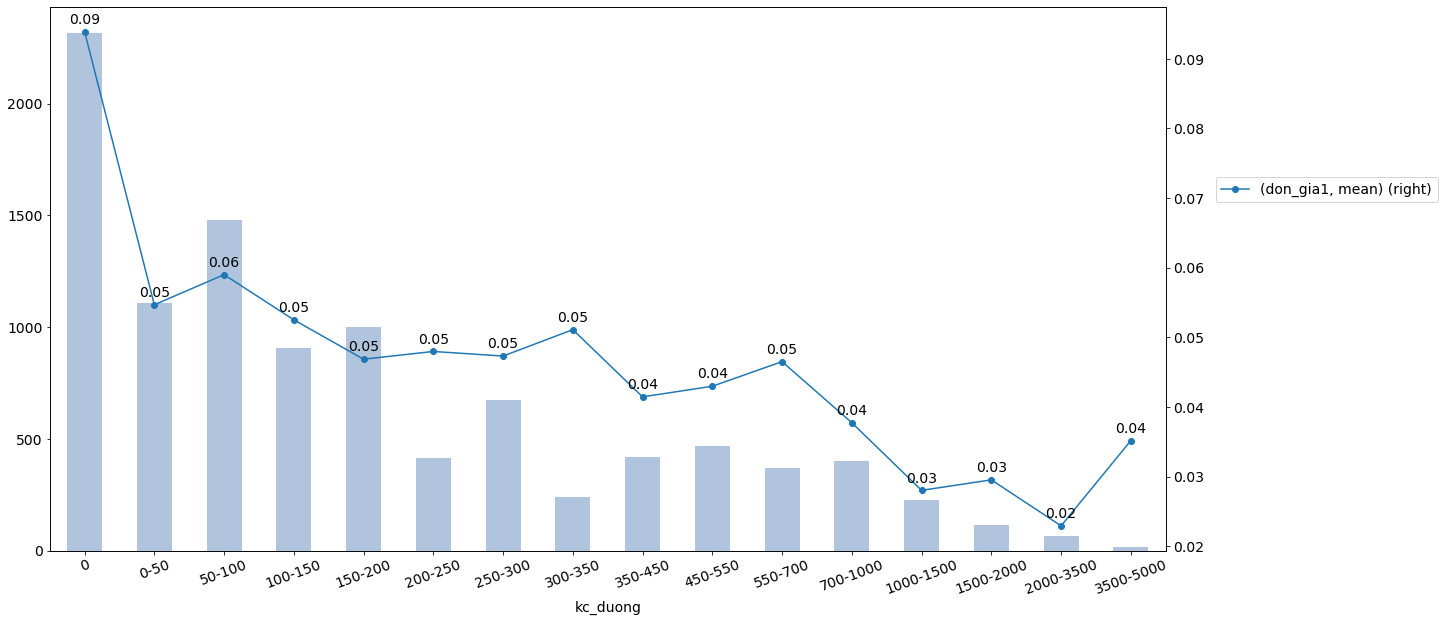

In [6]:
# Divide variables into bins
train['kc_duong'] = pd.cut(train.kc_duong_chinh, [-1, 0, 50, 100, 150, 200, 250, 300, 350, 450, 550, 700, 1000, 1500, 2000, 3500, 5000], right=True, 
                    labels=['0','0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-450','450-550','550-700','700-1000','1000-1500','1500-2000','2000-3500','3500-5000'])

# Plot count(kc_duong) and avg price by each 'kc_duong'
plot(train,var1='kc_duong',var2='don_gia1')

## Min_dorong_ngo vs don_gia

In [7]:
# Divide variables into quatiles
for i in range(1,101):
    print(i,train['min_dorong_ngo'].quantile(i/100))

1 1.5
2 1.6
3 1.7
4 1.8
5 1.8
6 1.9
7 2.0
8 2.0
9 2.0
10 2.0
11 2.0
12 2.0
13 2.0
14 2.1
15 2.2
16 2.2
17 2.3
18 2.3
19 2.4
20 2.5
21 2.5
22 2.5
23 2.5
24 2.5
25 2.6
26 2.7
27 2.7
28 2.8
29 2.9
30 3.0
31 3.0
32 3.0
33 3.0
34 3.0
35 3.1
36 3.2
37 3.3
38 3.4
39 3.5
40 3.5
41 3.5
42 3.5
43 3.7
44 3.8
45 4.0
46 4.0
47 4.0
48 4.0
49 4.0
50 4.0
51 4.16659999999998
52 4.5
53 4.5
54 4.5
55 4.8
56 5.0
57 5.0
58 5.0
59 5.0
60 5.0
61 5.0
62 5.0
63 5.3
64 5.5
65 5.5
66 6.0
67 6.0
68 6.0
69 6.0
70 6.0
71 6.0
72 6.5
73 7.0
74 7.0
75 7.0
76 7.0
77 7.0
78 7.5
79 8.0
80 8.0
81 8.0
82 9.0
83 10.0
84 10.0
85 10.0
86 10.0
87 10.0
88 11.0
89 11.5
90 12.0
91 13.0
92 13.5
93 15.0
94 15.0
95 17.0
96 20.0
97 20.0
98 30.0
99 30.0
100 60.0


<Figure size 432x288 with 0 Axes>

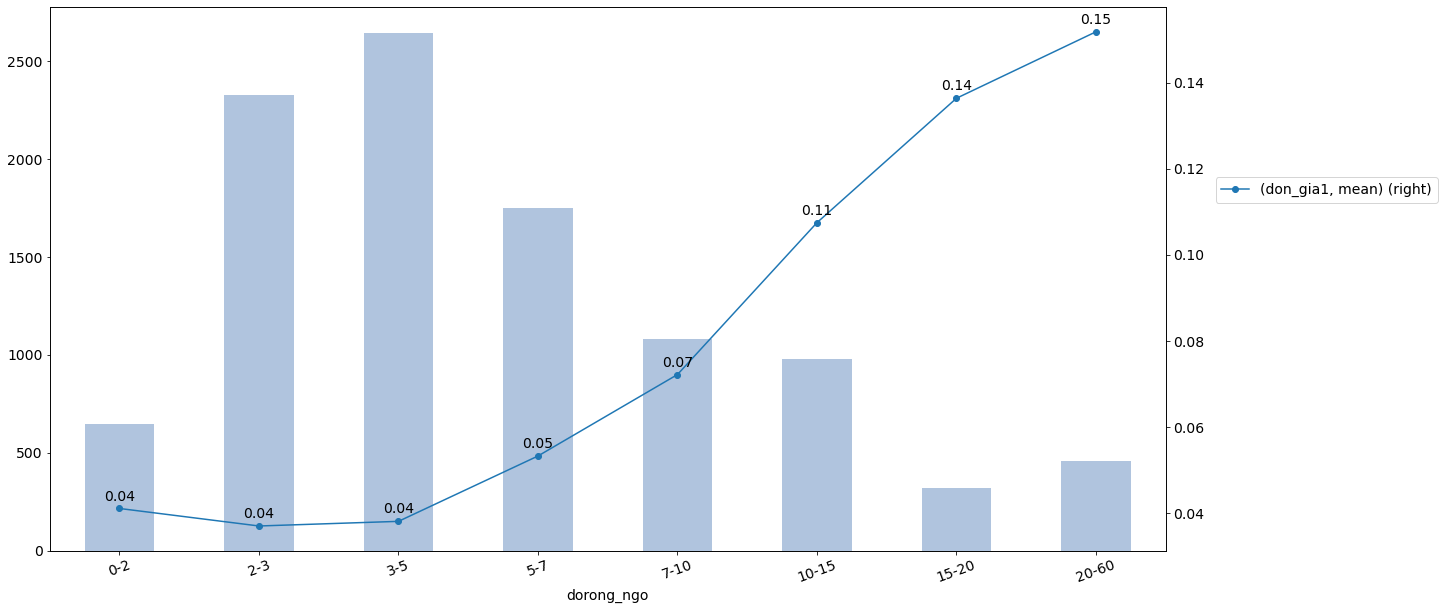

In [9]:
# Divide variables into bins
train['dorong_ngo'] = pd.cut(train.min_dorong_ngo, [0, 2, 3, 5, 7, 10, 15, 20, 60], right=False, 
                    labels=['0-2','2-3','3-5','5-7','7-10','10-15','15-20','20-60'])

# Plot count(min_do_rong_ngo) and avg price by each 'min_do_rong_ngo'
plot(train,var1='dorong_ngo',var2='don_gia1')

## Dien_tich vs don_gia

In [10]:
# Divide variables into quatiles
for i in range(1,101):
    print(i,train['dien_tich'].quantile(i/100))

1 30.0
2 31.0
3 32.3
4 33.1
5 34.670000003000006
6 35.0
7 36.0
8 37.6000000092
9 39.0
10 40.0
11 40.0
12 40.5
13 41.9
14 42.8999999936
15 44.500000011
16 45.0
17 46.0
18 47.73200000679999
19 49.0
20 50.0
21 50.0
22 50.23520000000002
23 52.0
24 53.0
25 54.5
26 55.048000000000044
27 57.0
28 59.0
29 60.0
30 60.0
31 60.0
32 61.5
33 63.0
34 64.5
35 65.4
36 67.0
37 68.5
38 70.0
39 70.0
40 72.0
41 73.0999999934
42 75.0
43 75.0
44 76.0
45 78.0
46 80.0
47 80.0
48 80.0
49 82.0
50 84.0
51 85.0
52 87.5000000096
53 90.0
54 90.0
55 92.0
56 94.64400001120005
57 96.6
58 98.8000000092
59 100.0
60 100.0
61 100.0
62 100.0
63 100.0
64 100.0
65 100.0
66 100.0
67 100.0
68 101.1
69 104.0
70 106.67999999999992
71 110.0
72 111.0
73 115.0
74 118.5
75 120.0
76 122.0
77 125.0
78 128.0
79 132.0
80 137.0
81 142.0
82 146.96800000000002
83 150.0
84 154.66399999999993
85 161.0
86 168.42799999999988
87 177.0
88 187.0
89 198.86000000000058
90 200.0
91 205.0
92 220.0
93 234.0
94 250.0
95 273.0
96 300.0
97 326.0
98 360.50

<Figure size 432x288 with 0 Axes>

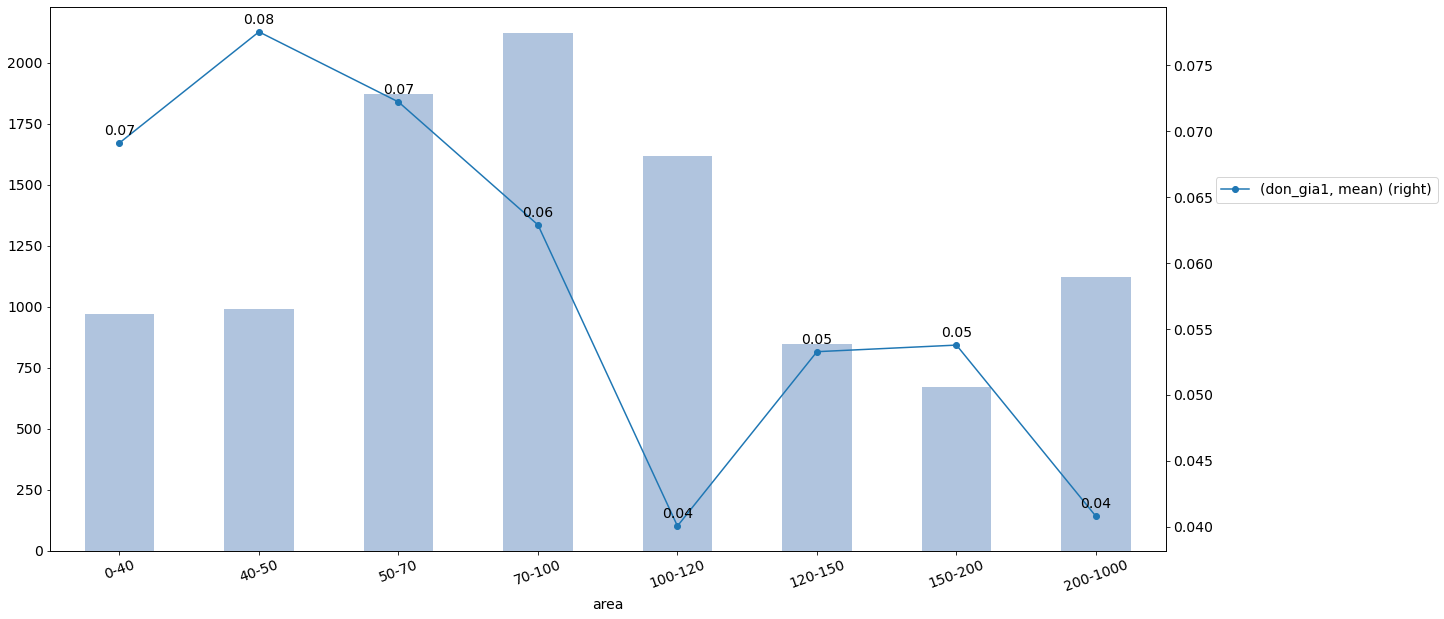

In [11]:
# Divide variables into bins
train['area'] = pd.cut(train.dien_tich, [0, 40, 50, 70, 100, 120, 150, 200, 1000], right=False, 
                    labels=['0-40','40-50','50-70','70-100','100-120','120-150','150-200','200-1000'])

# Plot count(dien_tich) and avg price by 'dien_tich'
plot(train,var1='area',var2='don_gia1')


## Do_dai_mat_tien vs don_gia

In [12]:
# Divide variables into quatiles
for i in range(1,101):
    print(i,train['mat_tien'].quantile(i/100))

1 2.79
2 3.0
3 3.06
4 3.2
5 3.3
6 3.4
7 3.5
8 3.5
9 3.5
10 3.6
11 3.671400000000001
12 3.79
13 3.8
14 3.92
15 4.0
16 4.0
17 4.0
18 4.0
19 4.0
20 4.0
21 4.0
22 4.0
23 4.0
24 4.0
25 4.1
26 4.182400000000002
27 4.2
28 4.28
29 4.38
30 4.5
31 4.5
32 4.5
33 4.5
34 4.5
35 4.6
36 4.7
37 4.8
38 4.96
39 5.0
40 5.0
41 5.0
42 5.0
43 5.0
44 5.0
45 5.0
46 5.0
47 5.0
48 5.0
49 5.0
50 5.0
51 5.0
52 5.0
53 5.0
54 5.0
55 5.0
56 5.0
57 5.0
58 5.02
59 5.11
60 5.2
61 5.3
62 5.4
63 5.5
64 5.52
65 5.7
66 5.9
67 6.0
68 6.0
69 6.0
70 6.02
71 6.21
72 6.5
73 6.68
74 7.0
75 7.0
76 7.11
77 7.489800000000005
78 7.714400000000005
79 8.0
80 8.0
81 8.4
82 8.7
83 9.0
84 9.4
85 9.94
86 10.0
87 10.0
88 10.0
89 10.508600000000005
90 11.0
91 11.7
92 12.0
93 12.5
94 13.525599999999994
95 14.315999999999987
96 15.0
97 16.5
98 18.0
99 20.72340000000002
100 62.0


<Figure size 432x288 with 0 Axes>

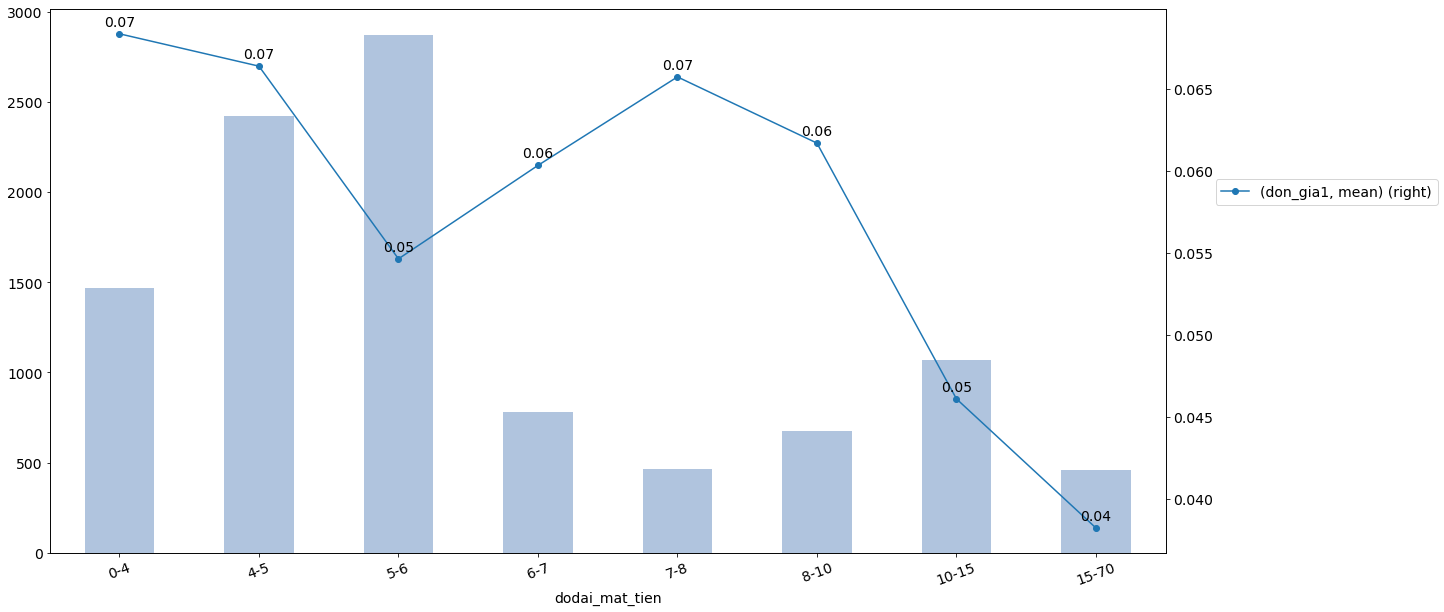

In [13]:
# Divide variables into bins
train['dodai_mat_tien'] = pd.cut(train.mat_tien, [0, 4, 5, 6, 7, 8, 10, 15, 70], right=False, 
                    labels=['0-4','4-5','5-6','6-7','7-8','8-10','10-15','15-70'])

# Plot count(do_dai_mat_tien) and avg price by each 'do_dai_mat_tien'
plot(train,var1='dodai_mat_tien',var2='don_gia1')

## So_mattien vs don_gia

<Figure size 432x288 with 0 Axes>

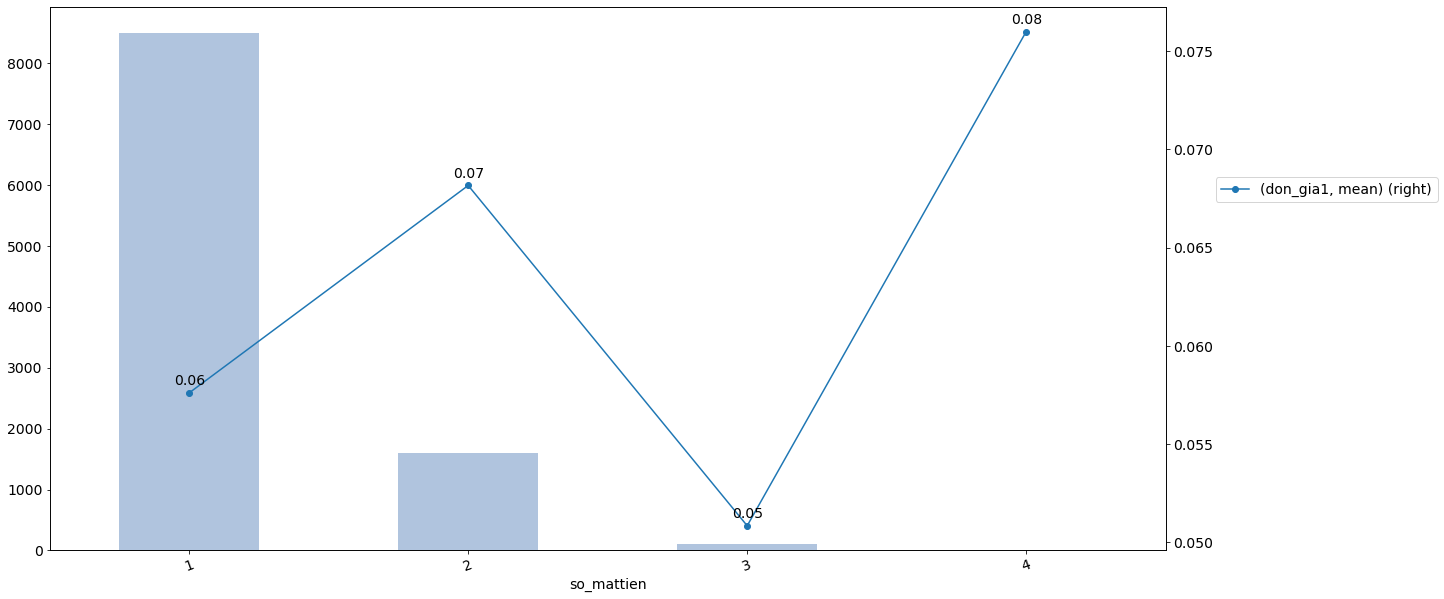

In [14]:
# Divide variables into bins
train['so_mattien'] = train['so_mattien'].astype("string")
# Plot count(so_mattien) and avg price by each 'do_dai_mat_tien'
plot(train,var1='so_mattien',var2='don_gia1')

# Encoding

## Encode district, ward, xa_phuong + duong_pho

In [14]:
#Encode string to numbers
label_encoder = preprocessing.LabelEncoder()
df['la_district'] = label_encoder.fit_transform(df['district'])
df['la_ward'] = label_encoder.fit_transform(df['ward'])

,stt,tinh,quan_huyen,xa_phuong,duong_pho,kc_duong_chinh,min_dorong_ngo,dien_tich,mat_tien,so_mattien,thoi_diem_hieu_luc,district,ward,REF_TINH_CODE,REF_HUYEN_CODE,REF_XA_CODE,don_gia1,Unnamed: 0,la_district,la_ward
0,1,Thành phố Hà Nội,Huyện Thạch Thất,Xã Chàng Sơn,Đường liên thôn,0.0,3.2,79.0,6.90,2,2021-06-22 00:00:00,thạch thất,thạch thất_chàng sơn,148873,152286,152355,0.036500,NaN,24,405
1,2,Thành phố Hà Nội,Huyện Thạch Thất,Xã Thạch Xá,Đường liên thôn,0.0,6.0,108.0,5.20,1,2021-06-14 00:00:00,thạch thất,thạch thất_thạch xá,148873,152286,152357,0.050000,NaN,24,416
2,3,Thành phố Hà Nội,Huyện Thanh Oai,Xã Bích Hòa,Đường 21B,300.0,2.5,106.0,4.00,1,2021-06-25 00:00:00,thanh oai,thanh oai_bích hòa,148873,152384,195441,0.022078,NaN,20,333
3,4,Thành phố Hà Nội,Huyện Thanh Trì,Xã Tam Hiệp,"Đường Phan Trọng Tuệ (đoạn qua xã Tam Hiệp, Th...",800.0,3.5,40.1,5.36,1,2021-06-23 00:00:00,thanh trì,thanh trì_tam hiệp,148873,152474,195383,0.049900,NaN,21,353
4,5,Thành phố Hà Nội,Huyện Thường Tín,Xã Vạn Điểm,Cao tốc Pháp Vân,350.0,2.8,179.5,11.20,1,2021-06-20 00:00:00,thường tín,thường tín_vạn điểm,148873,152587,152661,0.010523,NaN,23,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,105852,Thành phố Hà Nội,Huyện Thanh Trì,Xã Đại Áng,Đường Vĩnh Quỳnh - Đại Áng Từ hết địa phận xã ...,70.0,2.7,55.8,3.99,1,2022-03-16 00:00:00,thanh trì,thanh trì_đại áng,148873,152474,152565,0.028519,584.0,21,363
585,105854,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,300.0,13.0,90.0,6.00,1,2022-03-16 00:00:00,long biên,long biên_việt hưng,148873,150530,195281,0.213411,585.0,11,198
586,105855,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,350.0,13.0,90.0,6.00,1,2022-03-16 00:00:00,long biên,long biên_việt hưng,148873,150530,195281,0.241341,586.0,11,198
587,105856,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,300.0,13.0,90.0,6.00,1,2022-03-16 00:00:00,long biên,long biên_việt hưng,148873,150530,195281,0.222306,587.0,11,198


In [10]:
#Concat 2 columns
train['xp_dp'] = train['xa_phuong'] + '_' + train['duong_pho']
df['xp_dp'] = df['xa_phuong'] + '_' + df['duong_pho']

In [19]:
#Encode string to numbers
df['la_xp_dp'] = label_encoder.fit_transform(df['xp_dp'])

,stt,tinh,quan_huyen,xa_phuong,duong_pho,kc_duong_chinh,min_dorong_ngo,dien_tich,mat_tien,so_mattien,...,REF_HUYEN_CODE,REF_XA_CODE,don_gia1,Unnamed: 0,la_district,la_ward,avg_dist_don_gia,avg_ward_don_gia,xp_dp,la_xp_dp
0,1,Thành phố Hà Nội,Huyện Thạch Thất,Xã Chàng Sơn,Đường liên thôn,0.0,3.2,79.0,6.90,2,...,152286,152355,0.036500,NaN,24,405,0.026280,0.034411,Xã Chàng Sơn_Đường liên thôn,865
1,2,Thành phố Hà Nội,Huyện Thạch Thất,Xã Thạch Xá,Đường liên thôn,0.0,6.0,108.0,5.20,1,...,152286,152357,0.050000,NaN,24,416,0.026280,0.036702,Xã Thạch Xá_Đường liên thôn,1353
2,3,Thành phố Hà Nội,Huyện Thanh Oai,Xã Bích Hòa,Đường 21B,300.0,2.5,106.0,4.00,1,...,152384,195441,0.022078,NaN,20,333,0.020848,0.028953,Xã Bích Hòa_Đường 21B,835
3,4,Thành phố Hà Nội,Huyện Thanh Trì,Xã Tam Hiệp,"Đường Phan Trọng Tuệ (đoạn qua xã Tam Hiệp, Th...",800.0,3.5,40.1,5.36,1,...,152474,195383,0.049900,NaN,21,353,0.055205,0.045284,Xã Tam Hiệp_Đường Phan Trọng Tuệ (đoạn qua xã ...,1286
4,5,Thành phố Hà Nội,Huyện Thường Tín,Xã Vạn Điểm,Cao tốc Pháp Vân,350.0,2.8,179.5,11.20,1,...,152587,152661,0.010523,NaN,23,401,0.025681,0.026975,Xã Vạn Điểm_Cao tốc Pháp Vân,1571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,105852,Thành phố Hà Nội,Huyện Thanh Trì,Xã Đại Áng,Đường Vĩnh Quỳnh - Đại Áng Từ hết địa phận xã ...,70.0,2.7,55.8,3.99,1,...,152474,152565,0.028519,584.0,21,363,0.055205,0.028718,Xã Đại Áng_Đường Vĩnh Quỳnh - Đại Áng Từ hết đ...,1675
10860,105854,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,300.0,13.0,90.0,6.00,1,...,150530,195281,0.213411,585.0,11,198,0.089479,0.101960,Phường Việt Hưng_Trần Danh Tuyên,572
10861,105855,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,350.0,13.0,90.0,6.00,1,...,150530,195281,0.241341,586.0,11,198,0.089479,0.101960,Phường Việt Hưng_Trần Danh Tuyên,572
10862,105856,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,300.0,13.0,90.0,6.00,1,...,150530,195281,0.222306,587.0,11,198,0.089479,0.101960,Phường Việt Hưng_Trần Danh Tuyên,572


## Avg don_gia by district

In [7]:
dist = pd.DataFrame(train.groupby('district').don_gia1.mean().reset_index().rename(columns={"district": "district", "don_gia1": "avg_dist_don_gia"}))
dist

,district,avg_dist_don_gia
0,ba vì,0.025693
1,ba đình,0.177900
2,bắc từ liêm,0.083415
3,chương mỹ,0.019178
4,cầu giấy,0.167026
5,gia lâm,0.070283
6,hai bà trưng,0.185114
7,hoài đức,0.039784
8,hoàn kiếm,0.365149
9,hoàng mai,0.084352


## Avg don_gia by ward

In [8]:
ward = pd.DataFrame(train.groupby('ward').don_gia1.mean().reset_index().rename(columns={"ward": "ward", "don_gia1": "avg_ward_don_gia"}))
ward

,ward,avg_ward_don_gia
0,ba vì_ba trại,0.018228
1,ba vì_chu minh,0.037515
2,ba vì_cẩm lĩnh,0.010500
3,ba vì_cổ đô,0.013089
4,ba vì_minh quang,0.026000
...,...,...
498,ứng hòa_đại cường,0.009375
499,ứng hòa_đồng lỗ,0.005850
500,ứng hòa_đồng tiến,0.002625
501,ứng hòa_đồng tân,0.023407


## Avg don_gia by xa_phuong + duong_pho

In [11]:
xpdp = pd.DataFrame(train.groupby('xp_dp').don_gia1.mean().reset_index().rename(columns={"xp_dp": "xp_dp", "don_gia1": "avg_xp_dp_don_gia"}))
xpdp

,xp_dp,avg_xp_dp_don_gia
0,Phường Biên Giang_Quốc lộ 6,0.030680
1,Phường Biên Giang_Quốc lộ 6A,0.020232
2,Phường Biên Giang_Đường Biên Giang,0.022659
3,Phường Biên Giang_Đường Phú Mỹ,0.019559
4,Phường Bách Khoa_Lê Thanh Nghị,0.133289
...,...,...
1675,Xã Đức Giang_Đường 422,0.016952
1676,Xã Đức Giang_Đường tỉnh lộ 422,0.035319
1677,Xã Đức Thượng_Quốc lộ 32,0.042204
1678,Xã Đức Thượng_Đường quốc lộ 32: Đoạn qua địa p...,0.030428


## Left join with df table

In [12]:
df=pd.merge(df,dist, how='left')
df=pd.merge(df,ward, how='left')
df=pd.merge(df,xpdp, how='left')
df

,stt,tinh,quan_huyen,xa_phuong,duong_pho,kc_duong_chinh,min_dorong_ngo,dien_tich,mat_tien,so_mattien,...,ward,REF_TINH_CODE,REF_HUYEN_CODE,REF_XA_CODE,don_gia1,Unnamed: 0,xp_dp,avg_dist_don_gia,avg_ward_don_gia,avg_xp_dp_don_gia
0,1,Thành phố Hà Nội,Huyện Thạch Thất,Xã Chàng Sơn,Đường liên thôn,0.0,3.2,79.0,6.90,2,...,thạch thất_chàng sơn,148873,152286,152355,36.500000,NaN,Xã Chàng Sơn_Đường liên thôn,0.025638,0.034188,0.026788
1,2,Thành phố Hà Nội,Huyện Thạch Thất,Xã Thạch Xá,Đường liên thôn,0.0,6.0,108.0,5.20,1,...,thạch thất_thạch xá,148873,152286,152357,50.000000,NaN,Xã Thạch Xá_Đường liên thôn,0.025638,0.036766,0.023162
2,3,Thành phố Hà Nội,Huyện Thanh Oai,Xã Bích Hòa,Đường 21B,300.0,2.5,106.0,4.00,1,...,thanh oai_bích hòa,148873,152384,195441,22.078000,NaN,Xã Bích Hòa_Đường 21B,0.020054,0.028953,0.033304
3,4,Thành phố Hà Nội,Huyện Thanh Trì,Xã Tam Hiệp,"Đường Phan Trọng Tuệ (đoạn qua xã Tam Hiệp, Th...",800.0,3.5,40.1,5.36,1,...,thanh trì_tam hiệp,148873,152474,195383,49.900000,NaN,Xã Tam Hiệp_Đường Phan Trọng Tuệ (đoạn qua xã ...,0.055970,0.045284,0.042876
4,5,Thành phố Hà Nội,Huyện Thường Tín,Xã Vạn Điểm,Cao tốc Pháp Vân,350.0,2.8,179.5,11.20,1,...,thường tín_vạn điểm,148873,152587,152661,10.523000,NaN,Xã Vạn Điểm_Cao tốc Pháp Vân,0.024646,0.026975,0.011656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,105852,Thành phố Hà Nội,Huyện Thanh Trì,Xã Đại Áng,Đường Vĩnh Quỳnh - Đại Áng Từ hết địa phận xã ...,70.0,2.7,55.8,3.99,1,...,thanh trì_đại áng,148873,152474,152565,28.519239,584.0,Xã Đại Áng_Đường Vĩnh Quỳnh - Đại Áng Từ hết đ...,0.055970,0.029253,0.033830
10860,105854,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,300.0,13.0,90.0,6.00,1,...,long biên_việt hưng,148873,150530,195281,213.411111,585.0,Phường Việt Hưng_Trần Danh Tuyên,0.088389,0.099469,0.188754
10861,105855,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,350.0,13.0,90.0,6.00,1,...,long biên_việt hưng,148873,150530,195281,241.341111,586.0,Phường Việt Hưng_Trần Danh Tuyên,0.088389,0.099469,0.188754
10862,105856,Thành phố Hà Nội,Quận Long Biên,Phường Việt Hưng,Trần Danh Tuyên,300.0,13.0,90.0,6.00,1,...,long biên_việt hưng,148873,150530,195281,222.305556,587.0,Phường Việt Hưng_Trần Danh Tuyên,0.088389,0.099469,0.188754


# Correlation

## Multiply don_gia by 1000 to do modeling

In [13]:
df['don_gia1']=df['don_gia1']*1000

## Define X_train, X_test, Y_train, Y_test

In [14]:
X_train = df[df['thoi_diem_hieu_luc']  <= '2022-03-15'][['kc_duong_chinh', 'min_dorong_ngo', 'dien_tich', 'mat_tien', 'so_mattien','avg_dist_don_gia','avg_ward_don_gia','avg_xp_dp_don_gia','don_gia1']]
y_train = df[df['thoi_diem_hieu_luc']  <= '2022-03-15'][['don_gia1']]
X_test = df[df['thoi_diem_hieu_luc']  >= '2022-03-15'][['kc_duong_chinh', 'min_dorong_ngo', 'dien_tich', 'mat_tien', 'so_mattien','avg_dist_don_gia','avg_ward_don_gia','avg_xp_dp_don_gia','don_gia1']]
y_test = df[df['thoi_diem_hieu_luc']  <= '2022-03-15'][['don_gia1']]

## Fill null values

In [15]:
X_test.loc[X_test.avg_ward_don_gia.isnull()==True,'avg_ward_don_gia']=X_test.avg_dist_don_gia
X_test.loc[X_test.avg_xp_dp_don_gia.isnull()==True,'avg_xp_dp_don_gia']=X_test.avg_ward_don_gia

## Correlation heat map

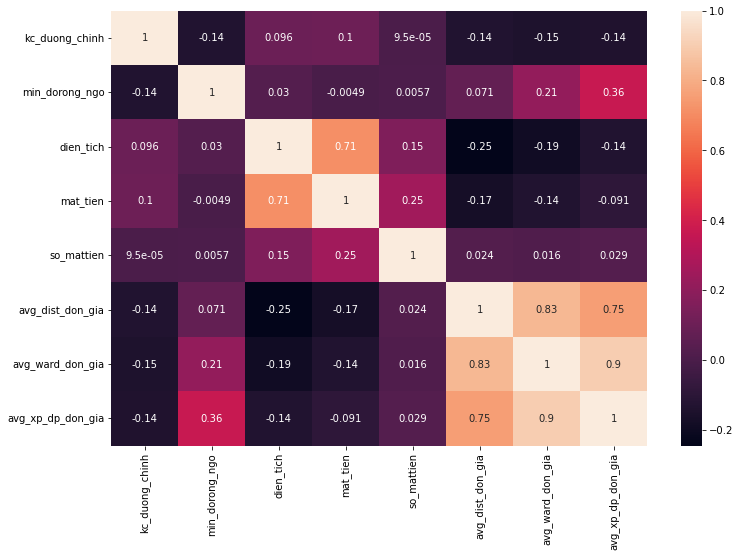

In [16]:
feature = ['kc_duong_chinh', 'min_dorong_ngo', 'dien_tich', 'mat_tien', 'so_mattien','avg_dist_don_gia','avg_ward_don_gia','avg_xp_dp_don_gia']
plt.figure(figsize=(12, 8))

X_corr = X_train[feature].corr()
sns.heatmap(X_corr, 
            annot = True);

## Scatterplot kc_duong_chinh vs don_gia

Text(0, 0.5, 'don_gia')

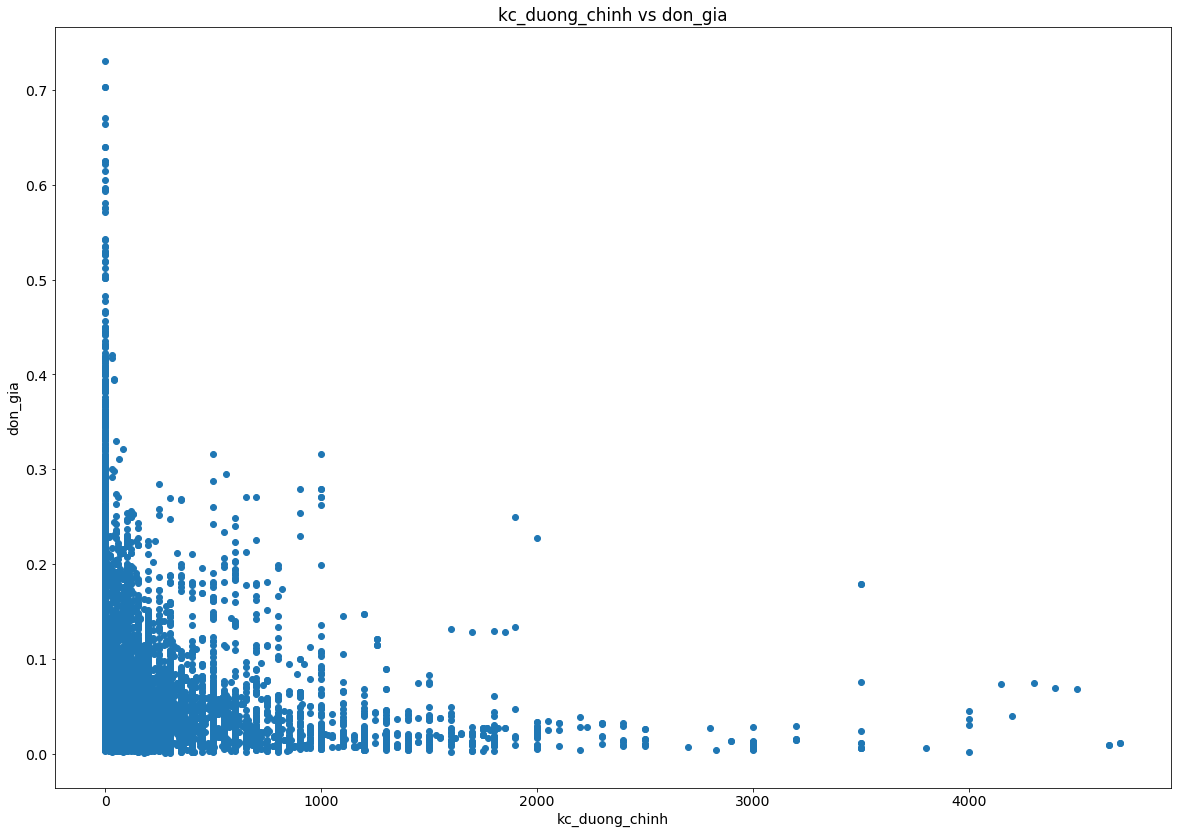

In [23]:
fig, ax = plt.subplots(figsize =(20, 14))
plt.scatter(X_train.kc_duong_chinh, X_train.don_gia1)
plt.title('kc_duong_chinh vs don_gia')
plt.xlabel('kc_duong_chinh')
plt.ylabel('don_gia')

## Scatterplot min_dorong_ngo vs don_gia

Text(0, 0.5, 'don_gia')

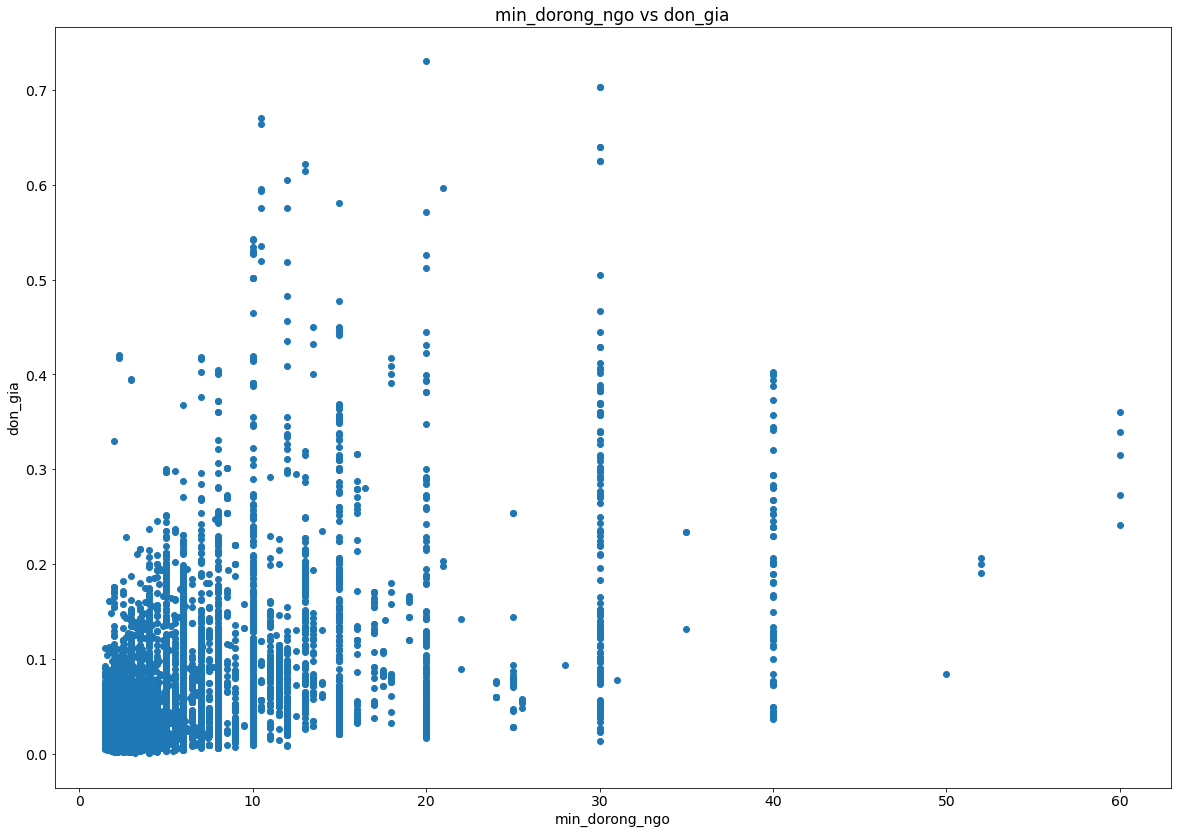

In [24]:
fig, ax = plt.subplots(figsize =(20, 14))
plt.scatter(X_train.min_dorong_ngo, X_train.don_gia1)
plt.title('min_dorong_ngo vs don_gia')
plt.xlabel('min_dorong_ngo')
plt.ylabel('don_gia')

## Scatterplot dien_tich vs don_gia

Text(0, 0.5, 'don_gia')

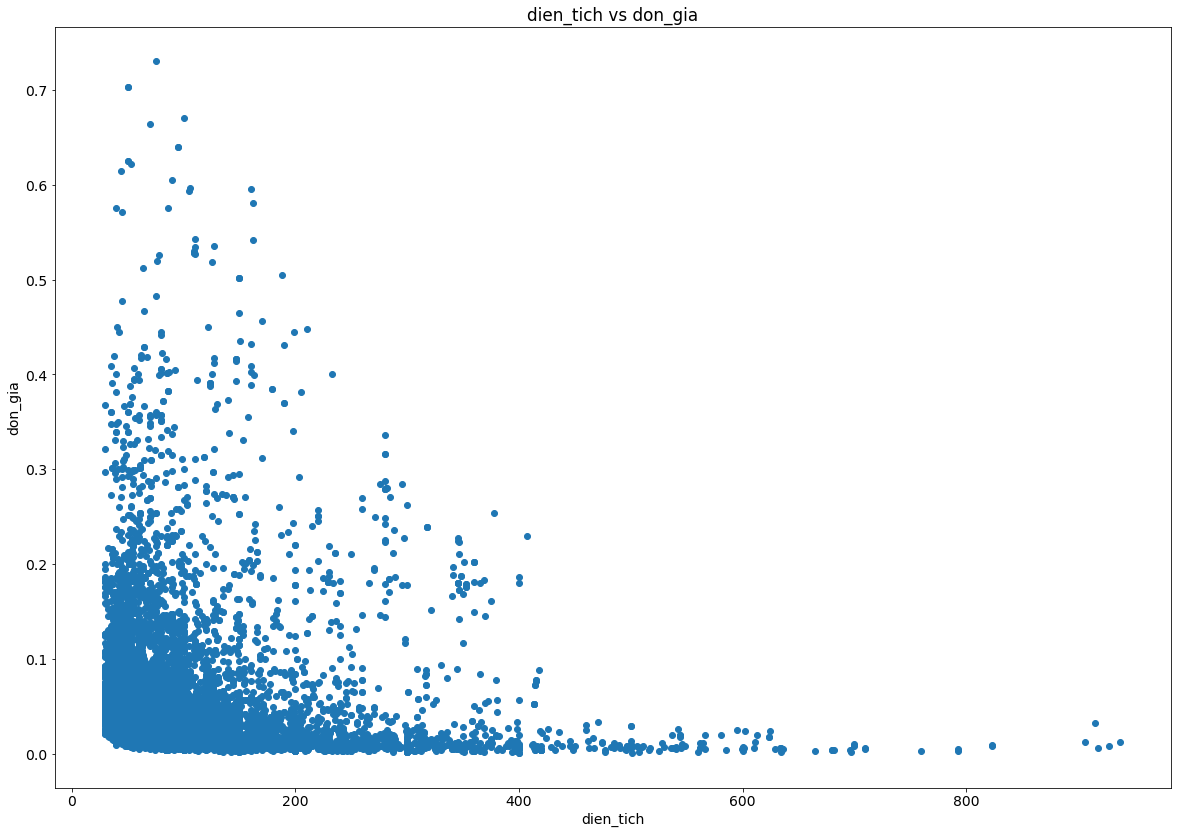

In [25]:
fig, ax = plt.subplots(figsize =(20, 14))
plt.scatter(X_train.dien_tich, X_train.don_gia1)
plt.title('dien_tich vs don_gia')
plt.xlabel('dien_tich')
plt.ylabel('don_gia')

## Scatterplot mat_tien vs don_gia

Text(0, 0.5, 'don_gia')

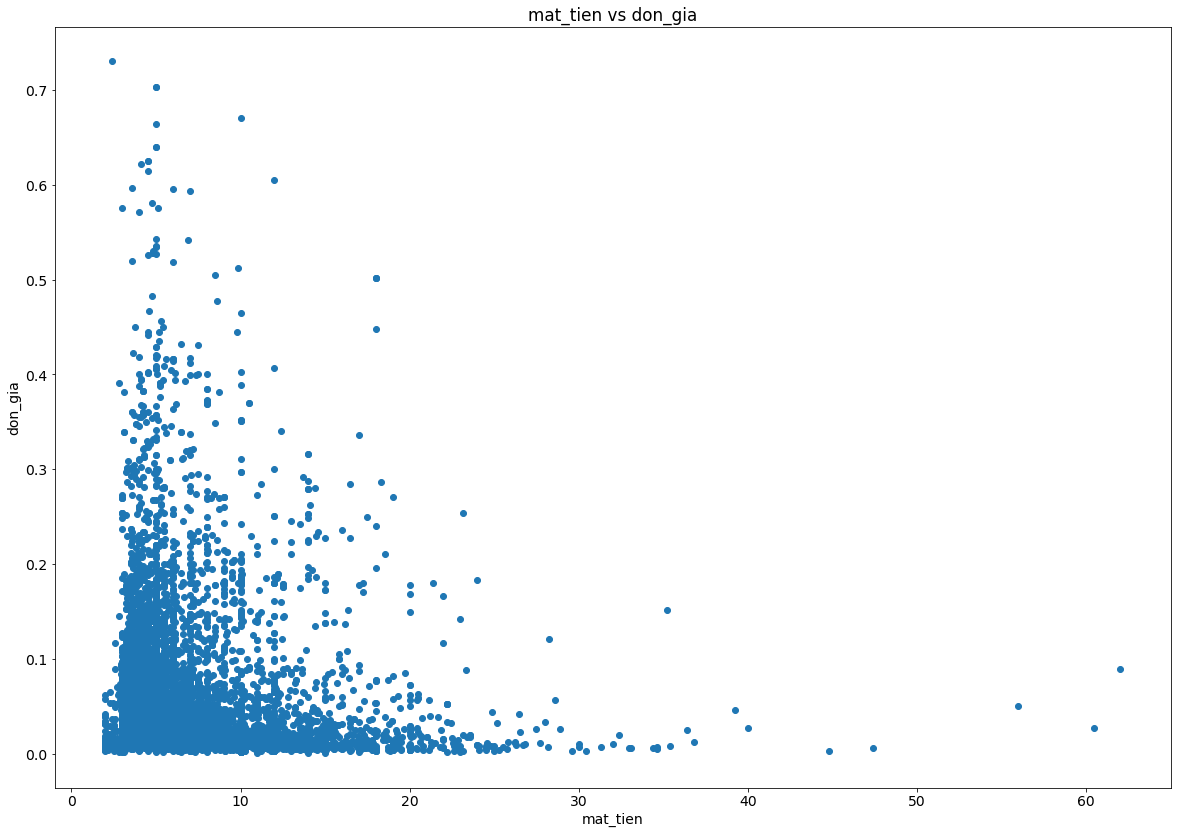

In [26]:
fig, ax = plt.subplots(figsize =(20, 14))
plt.scatter(X_train.mat_tien, X_train.don_gia1)
plt.title('mat_tien vs don_gia')
plt.xlabel('mat_tien')
plt.ylabel('don_gia')

## Scatterplot so_mattien vs don_gia

Text(0, 0.5, 'don_gia')

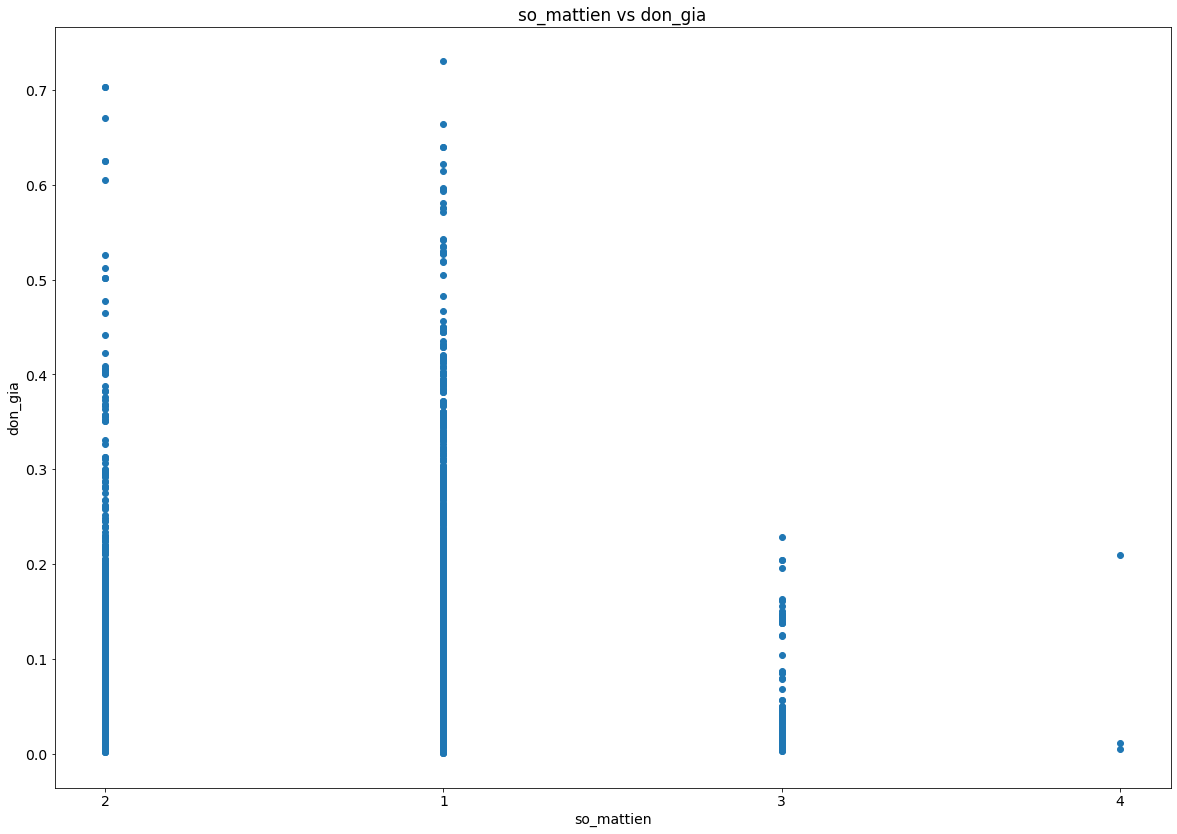

In [27]:
fig, ax = plt.subplots(figsize =(20, 14))
plt.scatter(X_train.so_mattien.astype('string'), X_train.don_gia1)
plt.title('so_mattien vs don_gia')
plt.xlabel('so_mattien')
plt.ylabel('don_gia')

## Scatterplot Avg_don_gia_district vs don_gia

Text(0, 0.5, 'don_gia')

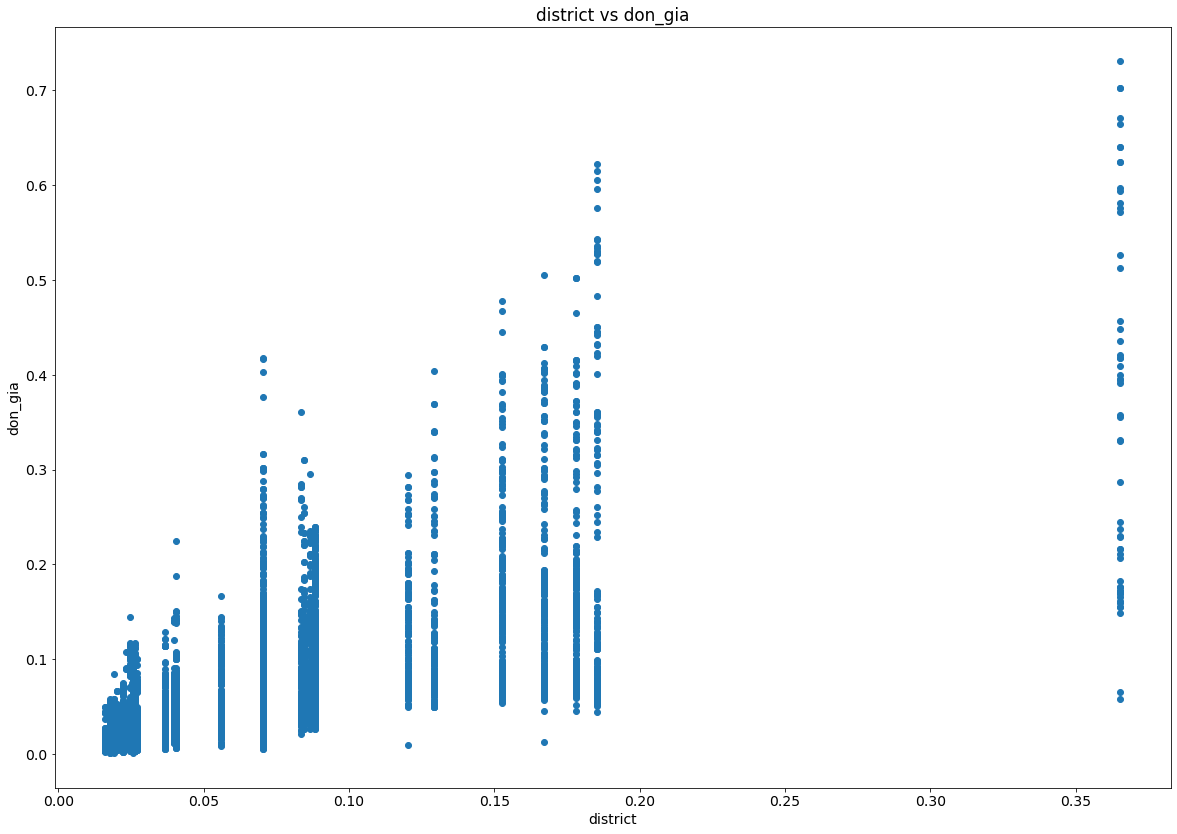

In [28]:
fig, ax = plt.subplots(figsize =(20, 14))
plt.scatter(X_train.avg_dist_don_gia, X_train.don_gia1)
plt.title('district vs don_gia')
plt.xlabel('district')
plt.ylabel('don_gia')

## Scatterplot Avg_don_gia_ward vs don_gia

Text(0, 0.5, 'don_gia')

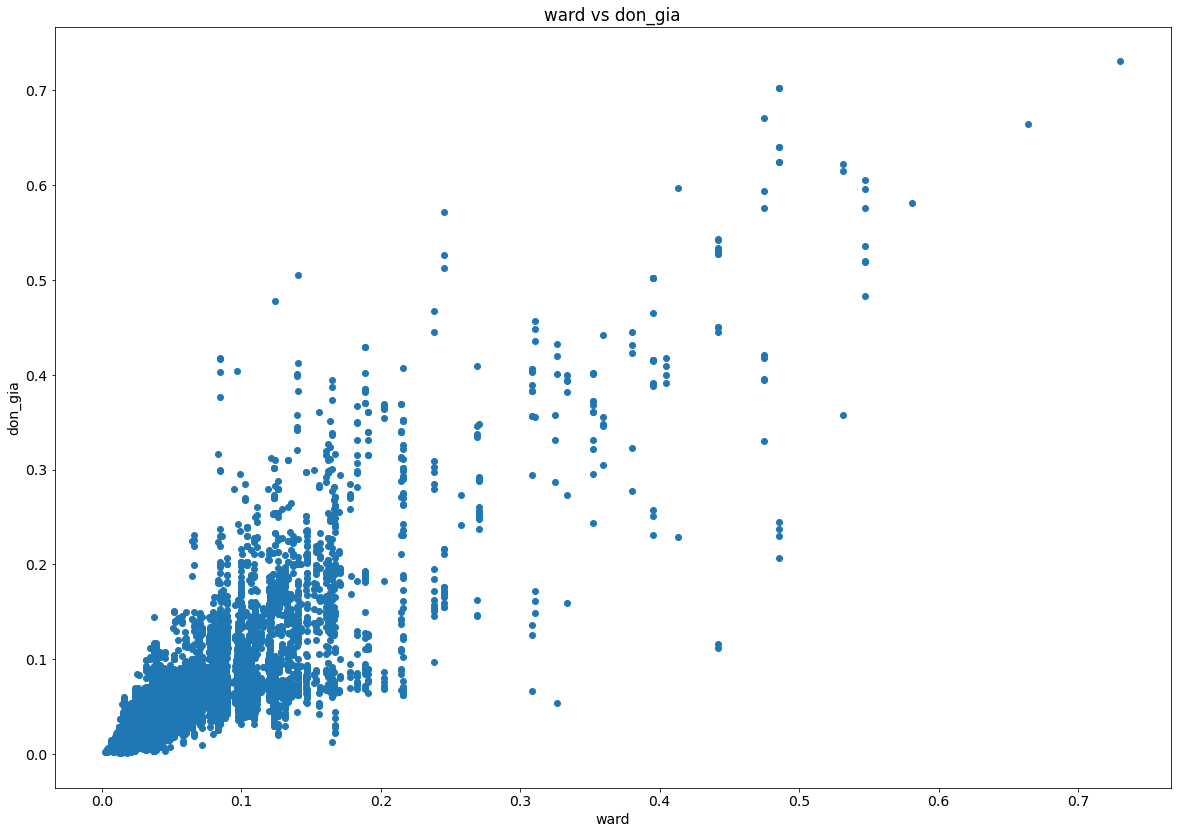

In [29]:
fig, ax = plt.subplots(figsize =(20, 14))
plt.scatter(X_train.avg_ward_don_gia, X_train.don_gia1)
plt.title('ward vs don_gia')
plt.xlabel('ward')
plt.ylabel('don_gia')

## Scatterplot Avg_don_gia_xp_dp vs don_gia

Text(0, 0.5, 'don_gia')

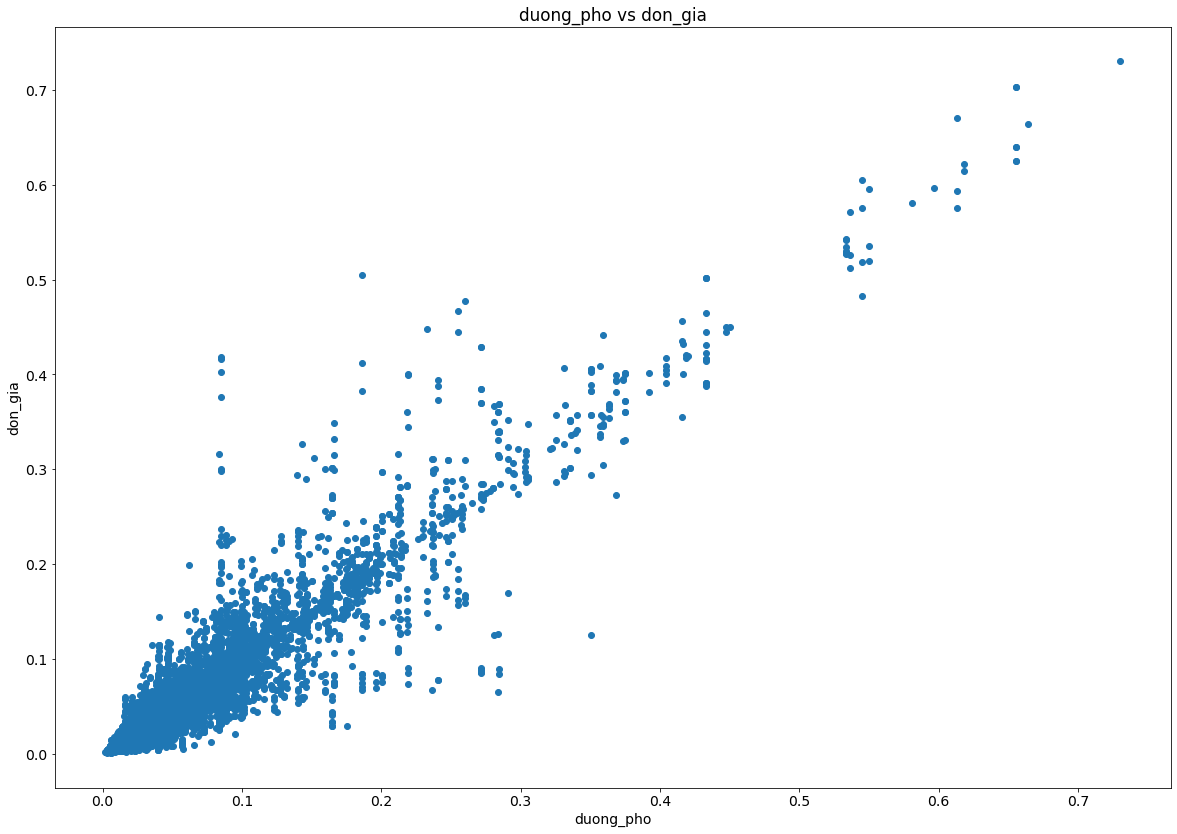

In [30]:
fig, ax = plt.subplots(figsize =(20, 14))
plt.scatter(X_train.avg_xp_dp_don_gia, X_train.don_gia1)
plt.title('duong_pho vs don_gia')
plt.xlabel('duong_pho')
plt.ylabel('don_gia')

# Train Models

## DecisionTreeRegressor

In [37]:
model_DTR = DecisionTreeRegressor(max_depth=8,min_samples_split=2,min_samples_leaf=2,max_leaf_nodes=256)
model_DTR.fit(X_train[feature], y_train)
y_pred = model_DTR.predict(X_test[feature])
mean_absolute_percentage_error(X_test.don_gia1,y_pred)

0.2747888182653239

## LinearRegression

In [38]:
model_LR = linear_model.LinearRegression()
model_LR.fit(X_train[feature], y_train)
y_pred1 = model_LR.predict(X_test[feature])
mean_absolute_percentage_error(X_test.don_gia1,y_pred1)

0.34424150085460375

## CatBoostRegressor

In [29]:
model_CBR = ctb.CatBoostRegressor(iterations=10000, max_depth = 12, max_leaves=4096)
model_CBR.fit(X_train[feature], y_train)
y_pred2 = model_CBR.predict(X_test[feature])
mean_absolute_percentage_error(X_test.don_gia1,y_pred2)

Learning rate set to 0.0091
0:	learn: 69443.5321211	total: 51.7ms	remaining: 8m 37s
1:	learn: 68910.6771195	total: 93.4ms	remaining: 7m 47s
2:	learn: 68421.6789833	total: 129ms	remaining: 7m 9s
3:	learn: 67915.9952129	total: 164ms	remaining: 6m 48s
4:	learn: 67418.7471092	total: 198ms	remaining: 6m 35s
5:	learn: 66910.8194097	total: 240ms	remaining: 6m 39s
6:	learn: 66392.8825284	total: 276ms	remaining: 6m 34s
7:	learn: 65909.0347308	total: 311ms	remaining: 6m 28s
8:	learn: 65426.7560272	total: 346ms	remaining: 6m 23s
9:	learn: 64947.9919032	total: 380ms	remaining: 6m 20s
10:	learn: 64472.2455784	total: 429ms	remaining: 6m 29s
11:	learn: 64010.3367287	total: 475ms	remaining: 6m 35s
12:	learn: 63548.4527510	total: 515ms	remaining: 6m 35s
13:	learn: 63104.6353573	total: 554ms	remaining: 6m 35s
14:	learn: 62666.6233304	total: 591ms	remaining: 6m 33s
15:	learn: 62227.7207312	total: 626ms	remaining: 6m 30s
16:	learn: 61756.8922192	total: 669ms	remaining: 6m 32s
17:	learn: 61315.1503013	tota

148:	learn: 27429.8573640	total: 5.33s	remaining: 5m 52s
149:	learn: 27304.3828945	total: 5.37s	remaining: 5m 52s
150:	learn: 27177.5780631	total: 5.41s	remaining: 5m 52s
151:	learn: 27045.2073650	total: 5.45s	remaining: 5m 53s
152:	learn: 26921.9190555	total: 5.49s	remaining: 5m 53s
153:	learn: 26803.9696478	total: 5.53s	remaining: 5m 53s
154:	learn: 26678.6818777	total: 5.56s	remaining: 5m 53s
155:	learn: 26561.1862507	total: 5.6s	remaining: 5m 53s
156:	learn: 26442.4569867	total: 5.64s	remaining: 5m 53s
157:	learn: 26329.2189353	total: 5.68s	remaining: 5m 53s
158:	learn: 26207.3588201	total: 5.72s	remaining: 5m 54s
159:	learn: 26089.7157536	total: 5.76s	remaining: 5m 54s
160:	learn: 25978.8729920	total: 5.8s	remaining: 5m 54s
161:	learn: 25851.4765273	total: 5.85s	remaining: 5m 55s
162:	learn: 25735.5716710	total: 5.88s	remaining: 5m 55s
163:	learn: 25619.1235556	total: 5.93s	remaining: 5m 55s
164:	learn: 25508.6929354	total: 5.97s	remaining: 5m 55s
165:	learn: 25402.7962219	total: 

294:	learn: 17478.1157582	total: 10.3s	remaining: 5m 38s
295:	learn: 17437.4610580	total: 10.3s	remaining: 5m 38s
296:	learn: 17400.5803302	total: 10.4s	remaining: 5m 38s
297:	learn: 17371.8175599	total: 10.4s	remaining: 5m 38s
298:	learn: 17341.5585519	total: 10.4s	remaining: 5m 38s
299:	learn: 17310.3376795	total: 10.5s	remaining: 5m 38s
300:	learn: 17272.2158087	total: 10.5s	remaining: 5m 38s
301:	learn: 17237.9894753	total: 10.5s	remaining: 5m 38s
302:	learn: 17212.2568130	total: 10.6s	remaining: 5m 38s
303:	learn: 17185.5912076	total: 10.6s	remaining: 5m 37s
304:	learn: 17147.0108573	total: 10.6s	remaining: 5m 37s
305:	learn: 17112.0967011	total: 10.7s	remaining: 5m 37s
306:	learn: 17086.0832568	total: 10.7s	remaining: 5m 37s
307:	learn: 17060.8843646	total: 10.7s	remaining: 5m 37s
308:	learn: 17024.4916219	total: 10.8s	remaining: 5m 37s
309:	learn: 16997.2291012	total: 10.8s	remaining: 5m 37s
310:	learn: 16971.7127724	total: 10.8s	remaining: 5m 37s
311:	learn: 16943.1198552	total

443:	learn: 14553.6091331	total: 15.5s	remaining: 5m 34s
444:	learn: 14542.1476920	total: 15.6s	remaining: 5m 34s
445:	learn: 14530.0580028	total: 15.6s	remaining: 5m 34s
446:	learn: 14519.8315674	total: 15.7s	remaining: 5m 35s
447:	learn: 14510.8402622	total: 15.7s	remaining: 5m 35s
448:	learn: 14498.7402391	total: 15.8s	remaining: 5m 35s
449:	learn: 14484.5002110	total: 15.8s	remaining: 5m 35s
450:	learn: 14475.8627915	total: 15.9s	remaining: 5m 35s
451:	learn: 14460.8018328	total: 15.9s	remaining: 5m 35s
452:	learn: 14450.6550540	total: 15.9s	remaining: 5m 35s
453:	learn: 14440.4611950	total: 16s	remaining: 5m 35s
454:	learn: 14424.6141450	total: 16s	remaining: 5m 35s
455:	learn: 14414.1076823	total: 16.1s	remaining: 5m 36s
456:	learn: 14404.2589442	total: 16.1s	remaining: 5m 36s
457:	learn: 14394.1389806	total: 16.1s	remaining: 5m 36s
458:	learn: 14382.6016958	total: 16.2s	remaining: 5m 36s
459:	learn: 14364.8008760	total: 16.2s	remaining: 5m 36s
460:	learn: 14352.3155440	total: 16

588:	learn: 13229.3266896	total: 20.9s	remaining: 5m 34s
589:	learn: 13219.8709191	total: 21s	remaining: 5m 34s
590:	learn: 13209.9371172	total: 21s	remaining: 5m 34s
591:	learn: 13204.9710767	total: 21s	remaining: 5m 34s
592:	learn: 13196.9003877	total: 21.1s	remaining: 5m 34s
593:	learn: 13191.0838329	total: 21.1s	remaining: 5m 34s
594:	learn: 13183.7208102	total: 21.1s	remaining: 5m 34s
595:	learn: 13175.0112377	total: 21.2s	remaining: 5m 33s
596:	learn: 13169.2372175	total: 21.2s	remaining: 5m 33s
597:	learn: 13161.2339970	total: 21.2s	remaining: 5m 33s
598:	learn: 13153.9552095	total: 21.3s	remaining: 5m 33s
599:	learn: 13147.8560991	total: 21.3s	remaining: 5m 33s
600:	learn: 13143.3283076	total: 21.3s	remaining: 5m 33s
601:	learn: 13136.1269166	total: 21.3s	remaining: 5m 33s
602:	learn: 13128.0325585	total: 21.4s	remaining: 5m 33s
603:	learn: 13122.4723584	total: 21.4s	remaining: 5m 33s
604:	learn: 13114.0752313	total: 21.4s	remaining: 5m 32s
605:	learn: 13104.3766005	total: 21.5

737:	learn: 12311.4827833	total: 26s	remaining: 5m 25s
738:	learn: 12308.0981704	total: 26s	remaining: 5m 25s
739:	learn: 12303.5280119	total: 26s	remaining: 5m 25s
740:	learn: 12297.6514907	total: 26.1s	remaining: 5m 25s
741:	learn: 12292.1208432	total: 26.1s	remaining: 5m 25s
742:	learn: 12282.3598401	total: 26.1s	remaining: 5m 25s
743:	learn: 12277.9311006	total: 26.1s	remaining: 5m 25s
744:	learn: 12272.3066124	total: 26.2s	remaining: 5m 25s
745:	learn: 12260.9985821	total: 26.2s	remaining: 5m 25s
746:	learn: 12253.4863413	total: 26.2s	remaining: 5m 25s
747:	learn: 12245.6583580	total: 26.3s	remaining: 5m 24s
748:	learn: 12241.6289724	total: 26.3s	remaining: 5m 24s
749:	learn: 12234.3915733	total: 26.3s	remaining: 5m 24s
750:	learn: 12230.4924530	total: 26.4s	remaining: 5m 24s
751:	learn: 12224.8771895	total: 26.4s	remaining: 5m 24s
752:	learn: 12219.8725111	total: 26.4s	remaining: 5m 24s
753:	learn: 12214.1829381	total: 26.5s	remaining: 5m 24s
754:	learn: 12204.8162554	total: 26.5

885:	learn: 11541.0558868	total: 30.5s	remaining: 5m 14s
886:	learn: 11536.7334413	total: 30.6s	remaining: 5m 14s
887:	learn: 11534.3323977	total: 30.6s	remaining: 5m 14s
888:	learn: 11529.6631712	total: 30.6s	remaining: 5m 13s
889:	learn: 11524.5833985	total: 30.7s	remaining: 5m 13s
890:	learn: 11519.8676479	total: 30.7s	remaining: 5m 13s
891:	learn: 11513.4168880	total: 30.7s	remaining: 5m 13s
892:	learn: 11508.9543266	total: 30.8s	remaining: 5m 13s
893:	learn: 11505.5167886	total: 30.8s	remaining: 5m 13s
894:	learn: 11498.8105500	total: 30.8s	remaining: 5m 13s
895:	learn: 11495.0334813	total: 30.9s	remaining: 5m 13s
896:	learn: 11485.3530391	total: 30.9s	remaining: 5m 13s
897:	learn: 11481.9875880	total: 30.9s	remaining: 5m 13s
898:	learn: 11477.3343690	total: 31s	remaining: 5m 13s
899:	learn: 11471.1940972	total: 31s	remaining: 5m 13s
900:	learn: 11466.2591966	total: 31s	remaining: 5m 13s
901:	learn: 11462.4258527	total: 31s	remaining: 5m 13s
902:	learn: 11457.0211508	total: 31.1s	

1037:	learn: 10840.9553642	total: 35.4s	remaining: 5m 5s
1038:	learn: 10834.4144008	total: 35.5s	remaining: 5m 5s
1039:	learn: 10830.8749984	total: 35.5s	remaining: 5m 5s
1040:	learn: 10827.1796554	total: 35.5s	remaining: 5m 5s
1041:	learn: 10824.8202797	total: 35.6s	remaining: 5m 5s
1042:	learn: 10822.0328728	total: 35.6s	remaining: 5m 5s
1043:	learn: 10817.5712110	total: 35.6s	remaining: 5m 5s
1044:	learn: 10814.6417141	total: 35.6s	remaining: 5m 5s
1045:	learn: 10811.4828047	total: 35.7s	remaining: 5m 5s
1046:	learn: 10808.1690662	total: 35.7s	remaining: 5m 5s
1047:	learn: 10804.2048052	total: 35.7s	remaining: 5m 5s
1048:	learn: 10801.3196608	total: 35.8s	remaining: 5m 5s
1049:	learn: 10796.0352024	total: 35.8s	remaining: 5m 5s
1050:	learn: 10791.7549303	total: 35.8s	remaining: 5m 5s
1051:	learn: 10788.0061103	total: 35.9s	remaining: 5m 5s
1052:	learn: 10786.7458457	total: 35.9s	remaining: 5m 5s
1053:	learn: 10783.9973311	total: 35.9s	remaining: 5m 4s
1054:	learn: 10775.3597879	tota

1186:	learn: 10284.8765038	total: 40.2s	remaining: 4m 58s
1187:	learn: 10280.2995223	total: 40.3s	remaining: 4m 58s
1188:	learn: 10277.0508462	total: 40.3s	remaining: 4m 58s
1189:	learn: 10274.2380823	total: 40.3s	remaining: 4m 58s
1190:	learn: 10267.4468223	total: 40.4s	remaining: 4m 58s
1191:	learn: 10264.9447346	total: 40.4s	remaining: 4m 58s
1192:	learn: 10262.6304609	total: 40.4s	remaining: 4m 58s
1193:	learn: 10260.2073164	total: 40.4s	remaining: 4m 58s
1194:	learn: 10256.5117019	total: 40.5s	remaining: 4m 58s
1195:	learn: 10251.4079638	total: 40.5s	remaining: 4m 58s
1196:	learn: 10248.2785381	total: 40.5s	remaining: 4m 58s
1197:	learn: 10246.0764086	total: 40.6s	remaining: 4m 58s
1198:	learn: 10244.4626614	total: 40.6s	remaining: 4m 58s
1199:	learn: 10242.0391571	total: 40.6s	remaining: 4m 57s
1200:	learn: 10239.9065384	total: 40.7s	remaining: 4m 57s
1201:	learn: 10237.3603798	total: 40.7s	remaining: 4m 57s
1202:	learn: 10234.2992453	total: 40.7s	remaining: 4m 57s
1203:	learn: 1

1333:	learn: 9777.7615118	total: 44.9s	remaining: 4m 51s
1334:	learn: 9772.2458905	total: 44.9s	remaining: 4m 51s
1335:	learn: 9767.5392995	total: 44.9s	remaining: 4m 51s
1336:	learn: 9764.3060986	total: 45s	remaining: 4m 51s
1337:	learn: 9762.4129296	total: 45s	remaining: 4m 51s
1338:	learn: 9759.0256635	total: 45s	remaining: 4m 51s
1339:	learn: 9753.5355381	total: 45s	remaining: 4m 51s
1340:	learn: 9752.4314647	total: 45.1s	remaining: 4m 50s
1341:	learn: 9751.6631183	total: 45.1s	remaining: 4m 50s
1342:	learn: 9745.0785954	total: 45.1s	remaining: 4m 50s
1343:	learn: 9743.4355162	total: 45.1s	remaining: 4m 50s
1344:	learn: 9742.5092045	total: 45.2s	remaining: 4m 50s
1345:	learn: 9739.0467059	total: 45.2s	remaining: 4m 50s
1346:	learn: 9737.7926724	total: 45.2s	remaining: 4m 50s
1347:	learn: 9733.8078167	total: 45.3s	remaining: 4m 50s
1348:	learn: 9730.9637661	total: 45.3s	remaining: 4m 50s
1349:	learn: 9727.7917533	total: 45.3s	remaining: 4m 50s
1350:	learn: 9723.6514794	total: 45.4s	

1480:	learn: 9324.5782394	total: 49.5s	remaining: 4m 44s
1481:	learn: 9321.8393260	total: 49.5s	remaining: 4m 44s
1482:	learn: 9319.9727348	total: 49.5s	remaining: 4m 44s
1483:	learn: 9317.5232665	total: 49.6s	remaining: 4m 44s
1484:	learn: 9312.6898186	total: 49.6s	remaining: 4m 44s
1485:	learn: 9311.0461152	total: 49.6s	remaining: 4m 44s
1486:	learn: 9309.9119630	total: 49.6s	remaining: 4m 44s
1487:	learn: 9307.2547124	total: 49.7s	remaining: 4m 44s
1488:	learn: 9302.7891288	total: 49.7s	remaining: 4m 44s
1489:	learn: 9299.9013263	total: 49.7s	remaining: 4m 44s
1490:	learn: 9296.4901760	total: 49.8s	remaining: 4m 44s
1491:	learn: 9294.8420947	total: 49.8s	remaining: 4m 44s
1492:	learn: 9293.4572227	total: 49.8s	remaining: 4m 43s
1493:	learn: 9291.2018939	total: 49.9s	remaining: 4m 43s
1494:	learn: 9288.9316951	total: 49.9s	remaining: 4m 43s
1495:	learn: 9285.9193292	total: 49.9s	remaining: 4m 43s
1496:	learn: 9285.2584957	total: 50s	remaining: 4m 43s
1497:	learn: 9283.1693340	total: 

1627:	learn: 8917.7094265	total: 54.2s	remaining: 4m 38s
1628:	learn: 8915.9739866	total: 54.3s	remaining: 4m 38s
1629:	learn: 8911.1331701	total: 54.3s	remaining: 4m 38s
1630:	learn: 8908.9227614	total: 54.3s	remaining: 4m 38s
1631:	learn: 8904.0058964	total: 54.4s	remaining: 4m 38s
1632:	learn: 8903.3279704	total: 54.4s	remaining: 4m 38s
1633:	learn: 8900.4811441	total: 54.4s	remaining: 4m 38s
1634:	learn: 8897.9376212	total: 54.5s	remaining: 4m 38s
1635:	learn: 8895.4277435	total: 54.5s	remaining: 4m 38s
1636:	learn: 8892.2466715	total: 54.5s	remaining: 4m 38s
1637:	learn: 8887.5200983	total: 54.6s	remaining: 4m 38s
1638:	learn: 8885.0951644	total: 54.6s	remaining: 4m 38s
1639:	learn: 8882.2036418	total: 54.6s	remaining: 4m 38s
1640:	learn: 8879.0121137	total: 54.7s	remaining: 4m 38s
1641:	learn: 8876.3096657	total: 54.7s	remaining: 4m 38s
1642:	learn: 8874.9395154	total: 54.7s	remaining: 4m 38s
1643:	learn: 8872.9404927	total: 54.8s	remaining: 4m 38s
1644:	learn: 8870.0649921	total

1778:	learn: 8544.8867102	total: 59.4s	remaining: 4m 34s
1779:	learn: 8542.7524201	total: 59.5s	remaining: 4m 34s
1780:	learn: 8540.9022115	total: 59.5s	remaining: 4m 34s
1781:	learn: 8538.1027972	total: 59.5s	remaining: 4m 34s
1782:	learn: 8534.4133061	total: 59.6s	remaining: 4m 34s
1783:	learn: 8534.2925308	total: 59.6s	remaining: 4m 34s
1784:	learn: 8530.4501036	total: 59.6s	remaining: 4m 34s
1785:	learn: 8528.8507494	total: 59.6s	remaining: 4m 34s
1786:	learn: 8526.9640585	total: 59.7s	remaining: 4m 34s
1787:	learn: 8525.3418094	total: 59.7s	remaining: 4m 34s
1788:	learn: 8521.2544966	total: 59.7s	remaining: 4m 34s
1789:	learn: 8518.9935293	total: 59.8s	remaining: 4m 34s
1790:	learn: 8516.4961126	total: 59.8s	remaining: 4m 34s
1791:	learn: 8516.3772007	total: 59.8s	remaining: 4m 33s
1792:	learn: 8514.2271390	total: 59.8s	remaining: 4m 33s
1793:	learn: 8510.1692914	total: 59.8s	remaining: 4m 33s
1794:	learn: 8507.9716635	total: 59.9s	remaining: 4m 33s
1795:	learn: 8506.4093777	total

1925:	learn: 8213.7303818	total: 1m 3s	remaining: 4m 28s
1926:	learn: 8212.0775127	total: 1m 3s	remaining: 4m 28s
1927:	learn: 8209.9817914	total: 1m 4s	remaining: 4m 28s
1928:	learn: 8207.3359237	total: 1m 4s	remaining: 4m 28s
1929:	learn: 8204.6199141	total: 1m 4s	remaining: 4m 28s
1930:	learn: 8202.1746220	total: 1m 4s	remaining: 4m 28s
1931:	learn: 8199.7131552	total: 1m 4s	remaining: 4m 28s
1932:	learn: 8198.5796676	total: 1m 4s	remaining: 4m 28s
1933:	learn: 8194.4621745	total: 1m 4s	remaining: 4m 27s
1934:	learn: 8191.2384957	total: 1m 4s	remaining: 4m 27s
1935:	learn: 8189.5238035	total: 1m 4s	remaining: 4m 27s
1936:	learn: 8186.9622798	total: 1m 4s	remaining: 4m 27s
1937:	learn: 8184.1374322	total: 1m 4s	remaining: 4m 27s
1938:	learn: 8181.5631005	total: 1m 4s	remaining: 4m 27s
1939:	learn: 8179.6991735	total: 1m 4s	remaining: 4m 27s
1940:	learn: 8179.6052888	total: 1m 4s	remaining: 4m 27s
1941:	learn: 8176.5382821	total: 1m 4s	remaining: 4m 27s
1942:	learn: 8174.5299962	total

2070:	learn: 7916.9816371	total: 1m 8s	remaining: 4m 22s
2071:	learn: 7915.0120078	total: 1m 8s	remaining: 4m 22s
2072:	learn: 7911.8123437	total: 1m 8s	remaining: 4m 22s
2073:	learn: 7911.7373978	total: 1m 8s	remaining: 4m 22s
2074:	learn: 7910.1463616	total: 1m 8s	remaining: 4m 22s
2075:	learn: 7908.0181959	total: 1m 8s	remaining: 4m 22s
2076:	learn: 7906.3642996	total: 1m 8s	remaining: 4m 21s
2077:	learn: 7905.1101777	total: 1m 8s	remaining: 4m 21s
2078:	learn: 7902.7849111	total: 1m 8s	remaining: 4m 21s
2079:	learn: 7900.3616358	total: 1m 8s	remaining: 4m 21s
2080:	learn: 7898.1852852	total: 1m 8s	remaining: 4m 21s
2081:	learn: 7896.1643390	total: 1m 8s	remaining: 4m 21s
2082:	learn: 7894.9248883	total: 1m 8s	remaining: 4m 21s
2083:	learn: 7894.8514578	total: 1m 8s	remaining: 4m 21s
2084:	learn: 7892.5476982	total: 1m 8s	remaining: 4m 21s
2085:	learn: 7891.2105194	total: 1m 8s	remaining: 4m 21s
2086:	learn: 7889.8468530	total: 1m 8s	remaining: 4m 21s
2087:	learn: 7886.9503454	total

2214:	learn: 7643.2238628	total: 1m 12s	remaining: 4m 16s
2215:	learn: 7642.4508750	total: 1m 12s	remaining: 4m 16s
2216:	learn: 7641.0290150	total: 1m 12s	remaining: 4m 16s
2217:	learn: 7639.8472134	total: 1m 13s	remaining: 4m 16s
2218:	learn: 7637.7629317	total: 1m 13s	remaining: 4m 16s
2219:	learn: 7635.0475397	total: 1m 13s	remaining: 4m 16s
2220:	learn: 7632.7354671	total: 1m 13s	remaining: 4m 16s
2221:	learn: 7631.1221870	total: 1m 13s	remaining: 4m 16s
2222:	learn: 7631.0599233	total: 1m 13s	remaining: 4m 15s
2223:	learn: 7628.2288618	total: 1m 13s	remaining: 4m 15s
2224:	learn: 7626.4021736	total: 1m 13s	remaining: 4m 15s
2225:	learn: 7623.7416173	total: 1m 13s	remaining: 4m 15s
2226:	learn: 7621.1225871	total: 1m 13s	remaining: 4m 15s
2227:	learn: 7619.2578597	total: 1m 13s	remaining: 4m 15s
2228:	learn: 7616.5342781	total: 1m 13s	remaining: 4m 15s
2229:	learn: 7614.7203685	total: 1m 13s	remaining: 4m 15s
2230:	learn: 7612.3897823	total: 1m 13s	remaining: 4m 15s
2231:	learn: 7

2361:	learn: 7359.1871636	total: 1m 17s	remaining: 4m 11s
2362:	learn: 7356.4094457	total: 1m 17s	remaining: 4m 11s
2363:	learn: 7354.8532144	total: 1m 17s	remaining: 4m 11s
2364:	learn: 7352.4566484	total: 1m 17s	remaining: 4m 11s
2365:	learn: 7351.2259658	total: 1m 17s	remaining: 4m 11s
2366:	learn: 7349.1043114	total: 1m 17s	remaining: 4m 11s
2367:	learn: 7347.8978228	total: 1m 17s	remaining: 4m 11s
2368:	learn: 7346.7161868	total: 1m 17s	remaining: 4m 11s
2369:	learn: 7345.5832917	total: 1m 17s	remaining: 4m 11s
2370:	learn: 7343.7162503	total: 1m 18s	remaining: 4m 11s
2371:	learn: 7341.0037707	total: 1m 18s	remaining: 4m 11s
2372:	learn: 7338.7998977	total: 1m 18s	remaining: 4m 11s
2373:	learn: 7338.7449672	total: 1m 18s	remaining: 4m 10s
2374:	learn: 7335.8412113	total: 1m 18s	remaining: 4m 10s
2375:	learn: 7334.3126774	total: 1m 18s	remaining: 4m 10s
2376:	learn: 7332.7194289	total: 1m 18s	remaining: 4m 10s
2377:	learn: 7330.7404363	total: 1m 18s	remaining: 4m 10s
2378:	learn: 7

2505:	learn: 7120.7478250	total: 1m 22s	remaining: 4m 5s
2506:	learn: 7119.7060740	total: 1m 22s	remaining: 4m 5s
2507:	learn: 7118.1907425	total: 1m 22s	remaining: 4m 5s
2508:	learn: 7117.2362636	total: 1m 22s	remaining: 4m 5s
2509:	learn: 7115.7191485	total: 1m 22s	remaining: 4m 5s
2510:	learn: 7114.6756204	total: 1m 22s	remaining: 4m 5s
2511:	learn: 7113.5763847	total: 1m 22s	remaining: 4m 5s
2512:	learn: 7111.1796772	total: 1m 22s	remaining: 4m 5s
2513:	learn: 7108.8224388	total: 1m 22s	remaining: 4m 5s
2514:	learn: 7107.9909982	total: 1m 22s	remaining: 4m 5s
2515:	learn: 7107.1636560	total: 1m 22s	remaining: 4m 5s
2516:	learn: 7105.3389617	total: 1m 22s	remaining: 4m 5s
2517:	learn: 7103.3883884	total: 1m 22s	remaining: 4m 5s
2518:	learn: 7101.7357755	total: 1m 22s	remaining: 4m 5s
2519:	learn: 7100.6428606	total: 1m 22s	remaining: 4m 5s
2520:	learn: 7099.3175093	total: 1m 22s	remaining: 4m 5s
2521:	learn: 7097.0424885	total: 1m 22s	remaining: 4m 5s
2522:	learn: 7095.6688998	total

2650:	learn: 6890.2731904	total: 1m 27s	remaining: 4m 1s
2651:	learn: 6888.8554855	total: 1m 27s	remaining: 4m 1s
2652:	learn: 6886.6218816	total: 1m 27s	remaining: 4m 1s
2653:	learn: 6884.9797099	total: 1m 27s	remaining: 4m 1s
2654:	learn: 6883.5318168	total: 1m 27s	remaining: 4m 1s
2655:	learn: 6881.6039380	total: 1m 27s	remaining: 4m 1s
2656:	learn: 6879.8869343	total: 1m 27s	remaining: 4m 1s
2657:	learn: 6878.4676840	total: 1m 27s	remaining: 4m 1s
2658:	learn: 6876.6916617	total: 1m 27s	remaining: 4m 1s
2659:	learn: 6875.2103375	total: 1m 27s	remaining: 4m 1s
2660:	learn: 6873.6854030	total: 1m 27s	remaining: 4m 1s
2661:	learn: 6872.4927904	total: 1m 27s	remaining: 4m 1s
2662:	learn: 6871.0150017	total: 1m 27s	remaining: 4m 1s
2663:	learn: 6870.3254223	total: 1m 27s	remaining: 4m 1s
2664:	learn: 6868.4591543	total: 1m 27s	remaining: 4m 1s
2665:	learn: 6867.2462237	total: 1m 27s	remaining: 4m 1s
2666:	learn: 6865.9451245	total: 1m 27s	remaining: 4m 1s
2667:	learn: 6863.0878134	total

2794:	learn: 6672.4853338	total: 1m 31s	remaining: 3m 56s
2795:	learn: 6671.0633201	total: 1m 31s	remaining: 3m 56s
2796:	learn: 6670.1776782	total: 1m 31s	remaining: 3m 56s
2797:	learn: 6668.9981897	total: 1m 32s	remaining: 3m 56s
2798:	learn: 6667.4543317	total: 1m 32s	remaining: 3m 56s
2799:	learn: 6665.5377473	total: 1m 32s	remaining: 3m 56s
2800:	learn: 6663.7205671	total: 1m 32s	remaining: 3m 56s
2801:	learn: 6661.9299277	total: 1m 32s	remaining: 3m 56s
2802:	learn: 6660.1968469	total: 1m 32s	remaining: 3m 56s
2803:	learn: 6658.6787540	total: 1m 32s	remaining: 3m 56s
2804:	learn: 6657.3263764	total: 1m 32s	remaining: 3m 56s
2805:	learn: 6655.4235849	total: 1m 32s	remaining: 3m 56s
2806:	learn: 6654.0484704	total: 1m 32s	remaining: 3m 56s
2807:	learn: 6652.3501059	total: 1m 32s	remaining: 3m 56s
2808:	learn: 6650.8680993	total: 1m 32s	remaining: 3m 56s
2809:	learn: 6650.2427628	total: 1m 32s	remaining: 3m 56s
2810:	learn: 6647.9955637	total: 1m 32s	remaining: 3m 56s
2811:	learn: 6

2940:	learn: 6465.6282319	total: 1m 36s	remaining: 3m 52s
2941:	learn: 6464.6000615	total: 1m 36s	remaining: 3m 52s
2942:	learn: 6463.1622062	total: 1m 37s	remaining: 3m 52s
2943:	learn: 6461.5857176	total: 1m 37s	remaining: 3m 52s
2944:	learn: 6459.9936811	total: 1m 37s	remaining: 3m 52s
2945:	learn: 6458.2524471	total: 1m 37s	remaining: 3m 52s
2946:	learn: 6457.2168222	total: 1m 37s	remaining: 3m 52s
2947:	learn: 6455.9265304	total: 1m 37s	remaining: 3m 52s
2948:	learn: 6455.1421257	total: 1m 37s	remaining: 3m 52s
2949:	learn: 6453.7365560	total: 1m 37s	remaining: 3m 52s
2950:	learn: 6451.8996410	total: 1m 37s	remaining: 3m 52s
2951:	learn: 6450.5171456	total: 1m 37s	remaining: 3m 52s
2952:	learn: 6448.8020506	total: 1m 37s	remaining: 3m 52s
2953:	learn: 6447.4456611	total: 1m 37s	remaining: 3m 52s
2954:	learn: 6445.9138080	total: 1m 37s	remaining: 3m 52s
2955:	learn: 6444.1824558	total: 1m 37s	remaining: 3m 52s
2956:	learn: 6443.2588257	total: 1m 37s	remaining: 3m 52s
2957:	learn: 6

3083:	learn: 6272.4954406	total: 1m 41s	remaining: 3m 48s
3084:	learn: 6271.5384316	total: 1m 41s	remaining: 3m 48s
3085:	learn: 6269.5908114	total: 1m 41s	remaining: 3m 48s
3086:	learn: 6267.7959416	total: 1m 41s	remaining: 3m 48s
3087:	learn: 6266.0635489	total: 1m 41s	remaining: 3m 48s
3088:	learn: 6264.7573786	total: 1m 41s	remaining: 3m 47s
3089:	learn: 6263.4851509	total: 1m 41s	remaining: 3m 47s
3090:	learn: 6262.4006330	total: 1m 41s	remaining: 3m 47s
3091:	learn: 6261.1290074	total: 1m 42s	remaining: 3m 47s
3092:	learn: 6260.1874134	total: 1m 42s	remaining: 3m 47s
3093:	learn: 6259.2330328	total: 1m 42s	remaining: 3m 47s
3094:	learn: 6257.9308970	total: 1m 42s	remaining: 3m 47s
3095:	learn: 6256.2617801	total: 1m 42s	remaining: 3m 47s
3096:	learn: 6254.4988990	total: 1m 42s	remaining: 3m 47s
3097:	learn: 6253.5969713	total: 1m 42s	remaining: 3m 47s
3098:	learn: 6252.3111714	total: 1m 42s	remaining: 3m 47s
3099:	learn: 6250.3791128	total: 1m 42s	remaining: 3m 47s
3100:	learn: 6

3226:	learn: 6115.4415047	total: 1m 46s	remaining: 3m 43s
3227:	learn: 6114.4723222	total: 1m 46s	remaining: 3m 43s
3228:	learn: 6112.8086184	total: 1m 46s	remaining: 3m 43s
3229:	learn: 6111.2934909	total: 1m 46s	remaining: 3m 43s
3230:	learn: 6109.7673967	total: 1m 46s	remaining: 3m 43s
3231:	learn: 6108.6380623	total: 1m 46s	remaining: 3m 43s
3232:	learn: 6107.6385253	total: 1m 46s	remaining: 3m 43s
3233:	learn: 6106.1456786	total: 1m 46s	remaining: 3m 43s
3234:	learn: 6105.0808504	total: 1m 46s	remaining: 3m 43s
3235:	learn: 6103.9117607	total: 1m 46s	remaining: 3m 43s
3236:	learn: 6103.0998929	total: 1m 46s	remaining: 3m 43s
3237:	learn: 6101.9142005	total: 1m 46s	remaining: 3m 43s
3238:	learn: 6101.4047603	total: 1m 46s	remaining: 3m 43s
3239:	learn: 6100.0319485	total: 1m 46s	remaining: 3m 43s
3240:	learn: 6098.3484324	total: 1m 46s	remaining: 3m 43s
3241:	learn: 6096.3768882	total: 1m 47s	remaining: 3m 43s
3242:	learn: 6095.7516288	total: 1m 47s	remaining: 3m 43s
3243:	learn: 6

3368:	learn: 5951.9212321	total: 1m 51s	remaining: 3m 39s
3369:	learn: 5950.5799981	total: 1m 51s	remaining: 3m 39s
3370:	learn: 5949.7082500	total: 1m 51s	remaining: 3m 39s
3371:	learn: 5948.3079937	total: 1m 51s	remaining: 3m 39s
3372:	learn: 5947.1187247	total: 1m 51s	remaining: 3m 39s
3373:	learn: 5945.5285406	total: 1m 51s	remaining: 3m 39s
3374:	learn: 5944.8656092	total: 1m 51s	remaining: 3m 39s
3375:	learn: 5944.2086482	total: 1m 51s	remaining: 3m 39s
3376:	learn: 5943.0565158	total: 1m 51s	remaining: 3m 39s
3377:	learn: 5942.5939881	total: 1m 52s	remaining: 3m 39s
3378:	learn: 5941.7223512	total: 1m 52s	remaining: 3m 39s
3379:	learn: 5940.5250091	total: 1m 52s	remaining: 3m 39s
3380:	learn: 5939.1951039	total: 1m 52s	remaining: 3m 39s
3381:	learn: 5938.8007283	total: 1m 52s	remaining: 3m 39s
3382:	learn: 5936.7713793	total: 1m 52s	remaining: 3m 39s
3383:	learn: 5935.6839941	total: 1m 52s	remaining: 3m 39s
3384:	learn: 5934.3066704	total: 1m 52s	remaining: 3m 39s
3385:	learn: 5

3516:	learn: 5794.4335773	total: 1m 56s	remaining: 3m 35s
3517:	learn: 5793.5187084	total: 1m 56s	remaining: 3m 35s
3518:	learn: 5792.6474866	total: 1m 56s	remaining: 3m 35s
3519:	learn: 5791.6766189	total: 1m 56s	remaining: 3m 35s
3520:	learn: 5790.7740696	total: 1m 56s	remaining: 3m 34s
3521:	learn: 5789.8421091	total: 1m 56s	remaining: 3m 34s
3522:	learn: 5788.7838018	total: 1m 56s	remaining: 3m 34s
3523:	learn: 5787.3914506	total: 1m 56s	remaining: 3m 34s
3524:	learn: 5786.3873557	total: 1m 56s	remaining: 3m 34s
3525:	learn: 5785.1159266	total: 1m 56s	remaining: 3m 34s
3526:	learn: 5784.5923783	total: 1m 57s	remaining: 3m 34s
3527:	learn: 5783.7743278	total: 1m 57s	remaining: 3m 34s
3528:	learn: 5782.0815358	total: 1m 57s	remaining: 3m 34s
3529:	learn: 5780.8127474	total: 1m 57s	remaining: 3m 34s
3530:	learn: 5779.4871667	total: 1m 57s	remaining: 3m 34s
3531:	learn: 5778.7846696	total: 1m 57s	remaining: 3m 34s
3532:	learn: 5778.2365932	total: 1m 57s	remaining: 3m 34s
3533:	learn: 5

3661:	learn: 5642.1393772	total: 2m 1s	remaining: 3m 30s
3662:	learn: 5641.1360312	total: 2m 1s	remaining: 3m 30s
3663:	learn: 5640.3422391	total: 2m 1s	remaining: 3m 30s
3664:	learn: 5639.5384013	total: 2m 1s	remaining: 3m 30s
3665:	learn: 5638.5090600	total: 2m 1s	remaining: 3m 30s
3666:	learn: 5637.0335080	total: 2m 1s	remaining: 3m 30s
3667:	learn: 5636.2990252	total: 2m 1s	remaining: 3m 30s
3668:	learn: 5635.5855320	total: 2m 1s	remaining: 3m 30s
3669:	learn: 5635.3582064	total: 2m 2s	remaining: 3m 30s
3670:	learn: 5634.1284862	total: 2m 2s	remaining: 3m 30s
3671:	learn: 5633.3212288	total: 2m 2s	remaining: 3m 30s
3672:	learn: 5632.5602614	total: 2m 2s	remaining: 3m 30s
3673:	learn: 5631.9707828	total: 2m 2s	remaining: 3m 30s
3674:	learn: 5631.0531351	total: 2m 2s	remaining: 3m 30s
3675:	learn: 5629.8289367	total: 2m 2s	remaining: 3m 30s
3676:	learn: 5628.8726704	total: 2m 2s	remaining: 3m 30s
3677:	learn: 5627.7440670	total: 2m 2s	remaining: 3m 30s
3678:	learn: 5626.3247157	total

3808:	learn: 5495.1383233	total: 2m 6s	remaining: 3m 26s
3809:	learn: 5493.3803741	total: 2m 6s	remaining: 3m 26s
3810:	learn: 5492.6435945	total: 2m 6s	remaining: 3m 25s
3811:	learn: 5491.0711752	total: 2m 6s	remaining: 3m 25s
3812:	learn: 5489.7108413	total: 2m 6s	remaining: 3m 25s
3813:	learn: 5488.8607086	total: 2m 6s	remaining: 3m 25s
3814:	learn: 5488.3094703	total: 2m 6s	remaining: 3m 25s
3815:	learn: 5487.5935934	total: 2m 7s	remaining: 3m 25s
3816:	learn: 5486.6041530	total: 2m 7s	remaining: 3m 25s
3817:	learn: 5485.7209087	total: 2m 7s	remaining: 3m 25s
3818:	learn: 5484.6854803	total: 2m 7s	remaining: 3m 25s
3819:	learn: 5484.3334754	total: 2m 7s	remaining: 3m 25s
3820:	learn: 5483.0545733	total: 2m 7s	remaining: 3m 25s
3821:	learn: 5481.7900752	total: 2m 7s	remaining: 3m 25s
3822:	learn: 5480.5449068	total: 2m 7s	remaining: 3m 25s
3823:	learn: 5479.4109547	total: 2m 7s	remaining: 3m 25s
3824:	learn: 5478.3773721	total: 2m 7s	remaining: 3m 25s
3825:	learn: 5477.0873917	total

3951:	learn: 5354.4336449	total: 2m 11s	remaining: 3m 21s
3952:	learn: 5353.9886967	total: 2m 11s	remaining: 3m 21s
3953:	learn: 5353.1375695	total: 2m 11s	remaining: 3m 21s
3954:	learn: 5352.1624780	total: 2m 11s	remaining: 3m 21s
3955:	learn: 5351.4347889	total: 2m 11s	remaining: 3m 21s
3956:	learn: 5349.8189480	total: 2m 11s	remaining: 3m 21s
3957:	learn: 5349.1952657	total: 2m 11s	remaining: 3m 21s
3958:	learn: 5348.3680012	total: 2m 12s	remaining: 3m 21s
3959:	learn: 5348.1524055	total: 2m 12s	remaining: 3m 21s
3960:	learn: 5346.8918463	total: 2m 12s	remaining: 3m 21s
3961:	learn: 5345.7939824	total: 2m 12s	remaining: 3m 21s
3962:	learn: 5344.5280268	total: 2m 12s	remaining: 3m 21s
3963:	learn: 5343.7812837	total: 2m 12s	remaining: 3m 21s
3964:	learn: 5342.8999896	total: 2m 12s	remaining: 3m 21s
3965:	learn: 5341.9818930	total: 2m 12s	remaining: 3m 21s
3966:	learn: 5340.4396298	total: 2m 12s	remaining: 3m 21s
3967:	learn: 5339.6518365	total: 2m 12s	remaining: 3m 21s
3968:	learn: 5

4098:	learn: 5218.6181145	total: 2m 16s	remaining: 3m 16s
4099:	learn: 5217.2501063	total: 2m 16s	remaining: 3m 16s
4100:	learn: 5216.3730342	total: 2m 16s	remaining: 3m 16s
4101:	learn: 5215.2622955	total: 2m 16s	remaining: 3m 16s
4102:	learn: 5214.2014052	total: 2m 16s	remaining: 3m 16s
4103:	learn: 5213.3905780	total: 2m 16s	remaining: 3m 16s
4104:	learn: 5212.1635484	total: 2m 16s	remaining: 3m 16s
4105:	learn: 5210.9962902	total: 2m 16s	remaining: 3m 16s
4106:	learn: 5209.6321843	total: 2m 16s	remaining: 3m 16s
4107:	learn: 5208.3804789	total: 2m 16s	remaining: 3m 16s
4108:	learn: 5207.4541190	total: 2m 16s	remaining: 3m 16s
4109:	learn: 5205.8794598	total: 2m 16s	remaining: 3m 16s
4110:	learn: 5204.6622846	total: 2m 16s	remaining: 3m 16s
4111:	learn: 5203.6316829	total: 2m 16s	remaining: 3m 16s
4112:	learn: 5202.8315651	total: 2m 17s	remaining: 3m 16s
4113:	learn: 5201.7588616	total: 2m 17s	remaining: 3m 16s
4114:	learn: 5200.8431112	total: 2m 17s	remaining: 3m 16s
4115:	learn: 5

4245:	learn: 5083.5668097	total: 2m 21s	remaining: 3m 11s
4246:	learn: 5082.3902001	total: 2m 21s	remaining: 3m 11s
4247:	learn: 5082.0533597	total: 2m 21s	remaining: 3m 11s
4248:	learn: 5081.0829030	total: 2m 21s	remaining: 3m 11s
4249:	learn: 5080.3165008	total: 2m 21s	remaining: 3m 11s
4250:	learn: 5079.8177316	total: 2m 21s	remaining: 3m 11s
4251:	learn: 5078.4606745	total: 2m 21s	remaining: 3m 11s
4252:	learn: 5077.4669620	total: 2m 21s	remaining: 3m 11s
4253:	learn: 5076.5951006	total: 2m 21s	remaining: 3m 11s
4254:	learn: 5075.6629417	total: 2m 21s	remaining: 3m 11s
4255:	learn: 5075.0668142	total: 2m 21s	remaining: 3m 11s
4256:	learn: 5074.1465851	total: 2m 21s	remaining: 3m 10s
4257:	learn: 5073.6103821	total: 2m 21s	remaining: 3m 10s
4258:	learn: 5072.3612178	total: 2m 21s	remaining: 3m 10s
4259:	learn: 5071.8394208	total: 2m 21s	remaining: 3m 10s
4260:	learn: 5071.1971521	total: 2m 21s	remaining: 3m 10s
4261:	learn: 5070.5776848	total: 2m 21s	remaining: 3m 10s
4262:	learn: 5

4393:	learn: 4961.4190153	total: 2m 25s	remaining: 3m 6s
4394:	learn: 4960.1498338	total: 2m 26s	remaining: 3m 6s
4395:	learn: 4959.3361035	total: 2m 26s	remaining: 3m 6s
4396:	learn: 4958.7132849	total: 2m 26s	remaining: 3m 6s
4397:	learn: 4958.2232830	total: 2m 26s	remaining: 3m 6s
4398:	learn: 4957.3176189	total: 2m 26s	remaining: 3m 6s
4399:	learn: 4956.6741892	total: 2m 26s	remaining: 3m 6s
4400:	learn: 4955.8581525	total: 2m 26s	remaining: 3m 6s
4401:	learn: 4955.0761759	total: 2m 26s	remaining: 3m 6s
4402:	learn: 4954.4167601	total: 2m 26s	remaining: 3m 5s
4403:	learn: 4953.5050668	total: 2m 26s	remaining: 3m 5s
4404:	learn: 4952.5432895	total: 2m 26s	remaining: 3m 5s
4405:	learn: 4951.5106360	total: 2m 26s	remaining: 3m 5s
4406:	learn: 4950.6935410	total: 2m 26s	remaining: 3m 5s
4407:	learn: 4949.4782814	total: 2m 26s	remaining: 3m 5s
4408:	learn: 4948.5896929	total: 2m 26s	remaining: 3m 5s
4409:	learn: 4947.3766932	total: 2m 26s	remaining: 3m 5s
4410:	learn: 4946.8012323	total

4539:	learn: 4845.1473755	total: 2m 30s	remaining: 3m 1s
4540:	learn: 4844.7211559	total: 2m 30s	remaining: 3m 1s
4541:	learn: 4843.9925434	total: 2m 30s	remaining: 3m 1s
4542:	learn: 4843.6340546	total: 2m 30s	remaining: 3m 1s
4543:	learn: 4842.9099086	total: 2m 30s	remaining: 3m 1s
4544:	learn: 4842.4910506	total: 2m 31s	remaining: 3m 1s
4545:	learn: 4841.4246557	total: 2m 31s	remaining: 3m 1s
4546:	learn: 4840.9458929	total: 2m 31s	remaining: 3m 1s
4547:	learn: 4840.1413263	total: 2m 31s	remaining: 3m 1s
4548:	learn: 4838.9548112	total: 2m 31s	remaining: 3m 1s
4549:	learn: 4838.2179175	total: 2m 31s	remaining: 3m 1s
4550:	learn: 4837.2607530	total: 2m 31s	remaining: 3m 1s
4551:	learn: 4836.5681567	total: 2m 31s	remaining: 3m
4552:	learn: 4835.7544220	total: 2m 31s	remaining: 3m
4553:	learn: 4834.9675153	total: 2m 31s	remaining: 3m
4554:	learn: 4833.9877659	total: 2m 31s	remaining: 3m
4555:	learn: 4833.1804924	total: 2m 31s	remaining: 3m
4556:	learn: 4831.9030338	total: 2m 31s	remain

4685:	learn: 4733.1077199	total: 2m 35s	remaining: 2m 56s
4686:	learn: 4732.1039930	total: 2m 35s	remaining: 2m 56s
4687:	learn: 4731.9329365	total: 2m 35s	remaining: 2m 56s
4688:	learn: 4731.1461125	total: 2m 35s	remaining: 2m 56s
4689:	learn: 4730.2841640	total: 2m 35s	remaining: 2m 56s
4690:	learn: 4730.0964831	total: 2m 35s	remaining: 2m 56s
4691:	learn: 4729.3932474	total: 2m 35s	remaining: 2m 56s
4692:	learn: 4728.7396190	total: 2m 35s	remaining: 2m 56s
4693:	learn: 4728.3372198	total: 2m 35s	remaining: 2m 55s
4694:	learn: 4727.6636157	total: 2m 35s	remaining: 2m 55s
4695:	learn: 4727.0129303	total: 2m 35s	remaining: 2m 55s
4696:	learn: 4725.9812937	total: 2m 35s	remaining: 2m 55s
4697:	learn: 4724.9932352	total: 2m 35s	remaining: 2m 55s
4698:	learn: 4724.7715275	total: 2m 35s	remaining: 2m 55s
4699:	learn: 4723.5248983	total: 2m 35s	remaining: 2m 55s
4700:	learn: 4722.7567071	total: 2m 35s	remaining: 2m 55s
4701:	learn: 4721.8753872	total: 2m 35s	remaining: 2m 55s
4702:	learn: 4

4830:	learn: 4634.8471086	total: 2m 39s	remaining: 2m 51s
4831:	learn: 4634.0893764	total: 2m 40s	remaining: 2m 51s
4832:	learn: 4633.4445756	total: 2m 40s	remaining: 2m 51s
4833:	learn: 4632.9739733	total: 2m 40s	remaining: 2m 51s
4834:	learn: 4632.4407419	total: 2m 40s	remaining: 2m 51s
4835:	learn: 4631.6879164	total: 2m 40s	remaining: 2m 51s
4836:	learn: 4630.9230388	total: 2m 40s	remaining: 2m 50s
4837:	learn: 4630.7371309	total: 2m 40s	remaining: 2m 50s
4838:	learn: 4629.9682926	total: 2m 40s	remaining: 2m 50s
4839:	learn: 4628.9038419	total: 2m 40s	remaining: 2m 50s
4840:	learn: 4628.1697681	total: 2m 40s	remaining: 2m 50s
4841:	learn: 4627.6309123	total: 2m 40s	remaining: 2m 50s
4842:	learn: 4626.6790175	total: 2m 40s	remaining: 2m 50s
4843:	learn: 4626.3045244	total: 2m 40s	remaining: 2m 50s
4844:	learn: 4625.4188574	total: 2m 40s	remaining: 2m 50s
4845:	learn: 4624.7385622	total: 2m 40s	remaining: 2m 50s
4846:	learn: 4623.8280235	total: 2m 40s	remaining: 2m 50s
4847:	learn: 4

4976:	learn: 4534.9352386	total: 2m 44s	remaining: 2m 46s
4977:	learn: 4534.0286318	total: 2m 44s	remaining: 2m 46s
4978:	learn: 4533.1459445	total: 2m 44s	remaining: 2m 46s
4979:	learn: 4532.2052843	total: 2m 44s	remaining: 2m 46s
4980:	learn: 4531.6473536	total: 2m 44s	remaining: 2m 46s
4981:	learn: 4531.2109508	total: 2m 44s	remaining: 2m 46s
4982:	learn: 4530.7085850	total: 2m 45s	remaining: 2m 46s
4983:	learn: 4529.9979015	total: 2m 45s	remaining: 2m 46s
4984:	learn: 4529.6085027	total: 2m 45s	remaining: 2m 46s
4985:	learn: 4529.4459128	total: 2m 45s	remaining: 2m 46s
4986:	learn: 4528.5245967	total: 2m 45s	remaining: 2m 45s
4987:	learn: 4527.5282501	total: 2m 45s	remaining: 2m 45s
4988:	learn: 4526.8828405	total: 2m 45s	remaining: 2m 45s
4989:	learn: 4526.0541190	total: 2m 45s	remaining: 2m 45s
4990:	learn: 4525.4233487	total: 2m 45s	remaining: 2m 45s
4991:	learn: 4524.5341454	total: 2m 45s	remaining: 2m 45s
4992:	learn: 4523.9181467	total: 2m 45s	remaining: 2m 45s
4993:	learn: 4

5122:	learn: 4435.9662518	total: 2m 49s	remaining: 2m 41s
5123:	learn: 4435.3684898	total: 2m 49s	remaining: 2m 41s
5124:	learn: 4435.0745581	total: 2m 49s	remaining: 2m 41s
5125:	learn: 4434.6538936	total: 2m 49s	remaining: 2m 41s
5126:	learn: 4433.8312697	total: 2m 49s	remaining: 2m 41s
5127:	learn: 4433.3389960	total: 2m 49s	remaining: 2m 41s
5128:	learn: 4432.7680143	total: 2m 49s	remaining: 2m 41s
5129:	learn: 4432.3939843	total: 2m 49s	remaining: 2m 41s
5130:	learn: 4431.8658441	total: 2m 49s	remaining: 2m 41s
5131:	learn: 4431.5415420	total: 2m 50s	remaining: 2m 41s
5132:	learn: 4431.2037840	total: 2m 50s	remaining: 2m 41s
5133:	learn: 4430.6471272	total: 2m 50s	remaining: 2m 41s
5134:	learn: 4430.1394168	total: 2m 50s	remaining: 2m 41s
5135:	learn: 4429.7169949	total: 2m 50s	remaining: 2m 41s
5136:	learn: 4428.6813560	total: 2m 50s	remaining: 2m 41s
5137:	learn: 4428.3983199	total: 2m 50s	remaining: 2m 41s
5138:	learn: 4427.9271906	total: 2m 50s	remaining: 2m 41s
5139:	learn: 4

5269:	learn: 4344.2827934	total: 2m 54s	remaining: 2m 36s
5270:	learn: 4343.6993869	total: 2m 54s	remaining: 2m 36s
5271:	learn: 4343.1043726	total: 2m 54s	remaining: 2m 36s
5272:	learn: 4342.6074675	total: 2m 54s	remaining: 2m 36s
5273:	learn: 4342.3902227	total: 2m 54s	remaining: 2m 36s
5274:	learn: 4341.6299518	total: 2m 55s	remaining: 2m 36s
5275:	learn: 4341.3864833	total: 2m 55s	remaining: 2m 36s
5276:	learn: 4340.6521199	total: 2m 55s	remaining: 2m 36s
5277:	learn: 4340.3069862	total: 2m 55s	remaining: 2m 36s
5278:	learn: 4340.0985993	total: 2m 55s	remaining: 2m 36s
5279:	learn: 4339.3505838	total: 2m 55s	remaining: 2m 36s
5280:	learn: 4338.9213737	total: 2m 55s	remaining: 2m 36s
5281:	learn: 4337.8635876	total: 2m 55s	remaining: 2m 36s
5282:	learn: 4336.9939690	total: 2m 55s	remaining: 2m 36s
5283:	learn: 4336.5526199	total: 2m 55s	remaining: 2m 36s
5284:	learn: 4335.9490414	total: 2m 55s	remaining: 2m 36s
5285:	learn: 4335.3636629	total: 2m 55s	remaining: 2m 36s
5286:	learn: 4

5411:	learn: 4257.8940124	total: 2m 59s	remaining: 2m 32s
5412:	learn: 4257.5804500	total: 2m 59s	remaining: 2m 32s
5413:	learn: 4256.8085933	total: 2m 59s	remaining: 2m 32s
5414:	learn: 4256.0648235	total: 2m 59s	remaining: 2m 32s
5415:	learn: 4255.6930372	total: 2m 59s	remaining: 2m 32s
5416:	learn: 4255.0060252	total: 2m 59s	remaining: 2m 32s
5417:	learn: 4254.3200758	total: 2m 59s	remaining: 2m 32s
5418:	learn: 4253.6617296	total: 2m 59s	remaining: 2m 32s
5419:	learn: 4253.0698078	total: 2m 59s	remaining: 2m 32s
5420:	learn: 4252.3919123	total: 2m 59s	remaining: 2m 32s
5421:	learn: 4251.7817068	total: 3m	remaining: 2m 31s
5422:	learn: 4251.1515204	total: 3m	remaining: 2m 31s
5423:	learn: 4250.7456358	total: 3m	remaining: 2m 31s
5424:	learn: 4249.9841605	total: 3m	remaining: 2m 31s
5425:	learn: 4249.8464928	total: 3m	remaining: 2m 31s
5426:	learn: 4249.4344415	total: 3m	remaining: 2m 31s
5427:	learn: 4248.8529307	total: 3m	remaining: 2m 31s
5428:	learn: 4248.3254378	total: 3m	remain

5561:	learn: 4170.9748325	total: 3m 4s	remaining: 2m 27s
5562:	learn: 4170.1359765	total: 3m 4s	remaining: 2m 27s
5563:	learn: 4169.8152952	total: 3m 4s	remaining: 2m 27s
5564:	learn: 4169.2955322	total: 3m 4s	remaining: 2m 27s
5565:	learn: 4168.8853966	total: 3m 4s	remaining: 2m 27s
5566:	learn: 4168.5659829	total: 3m 4s	remaining: 2m 27s
5567:	learn: 4168.2812417	total: 3m 4s	remaining: 2m 27s
5568:	learn: 4167.6618144	total: 3m 4s	remaining: 2m 27s
5569:	learn: 4166.9842569	total: 3m 4s	remaining: 2m 27s
5570:	learn: 4166.0821807	total: 3m 4s	remaining: 2m 27s
5571:	learn: 4165.8720713	total: 3m 5s	remaining: 2m 27s
5572:	learn: 4164.8718860	total: 3m 5s	remaining: 2m 26s
5573:	learn: 4164.5479317	total: 3m 5s	remaining: 2m 26s
5574:	learn: 4164.0783708	total: 3m 5s	remaining: 2m 26s
5575:	learn: 4163.6881820	total: 3m 5s	remaining: 2m 26s
5576:	learn: 4163.1072850	total: 3m 5s	remaining: 2m 26s
5577:	learn: 4162.5717418	total: 3m 5s	remaining: 2m 26s
5578:	learn: 4162.0777090	total

5710:	learn: 4084.4176146	total: 3m 9s	remaining: 2m 22s
5711:	learn: 4083.9759752	total: 3m 9s	remaining: 2m 22s
5712:	learn: 4083.3876142	total: 3m 9s	remaining: 2m 22s
5713:	learn: 4082.8531049	total: 3m 9s	remaining: 2m 22s
5714:	learn: 4081.8743165	total: 3m 9s	remaining: 2m 22s
5715:	learn: 4081.3699931	total: 3m 9s	remaining: 2m 22s
5716:	learn: 4080.6849148	total: 3m 9s	remaining: 2m 22s
5717:	learn: 4080.2823970	total: 3m 9s	remaining: 2m 22s
5718:	learn: 4080.0010240	total: 3m 9s	remaining: 2m 22s
5719:	learn: 4079.2103842	total: 3m 9s	remaining: 2m 22s
5720:	learn: 4078.7373659	total: 3m 9s	remaining: 2m 22s
5721:	learn: 4077.9967890	total: 3m 10s	remaining: 2m 22s
5722:	learn: 4077.5228840	total: 3m 10s	remaining: 2m 22s
5723:	learn: 4076.5352637	total: 3m 10s	remaining: 2m 21s
5724:	learn: 4075.7868798	total: 3m 10s	remaining: 2m 21s
5725:	learn: 4075.3934188	total: 3m 10s	remaining: 2m 21s
5726:	learn: 4074.9356659	total: 3m 10s	remaining: 2m 21s
5727:	learn: 4074.5080768

5852:	learn: 4003.8684188	total: 3m 14s	remaining: 2m 17s
5853:	learn: 4003.5589353	total: 3m 14s	remaining: 2m 17s
5854:	learn: 4003.2738809	total: 3m 14s	remaining: 2m 17s
5855:	learn: 4002.6882342	total: 3m 14s	remaining: 2m 17s
5856:	learn: 4002.1608339	total: 3m 14s	remaining: 2m 17s
5857:	learn: 4001.6857833	total: 3m 14s	remaining: 2m 17s
5858:	learn: 4000.8691461	total: 3m 14s	remaining: 2m 17s
5859:	learn: 4000.0465898	total: 3m 14s	remaining: 2m 17s
5860:	learn: 3999.5900810	total: 3m 14s	remaining: 2m 17s
5861:	learn: 3999.0939552	total: 3m 14s	remaining: 2m 17s
5862:	learn: 3998.3964816	total: 3m 14s	remaining: 2m 17s
5863:	learn: 3997.5494746	total: 3m 14s	remaining: 2m 17s
5864:	learn: 3996.6500612	total: 3m 14s	remaining: 2m 17s
5865:	learn: 3996.1080834	total: 3m 14s	remaining: 2m 17s
5866:	learn: 3995.6000993	total: 3m 14s	remaining: 2m 17s
5867:	learn: 3995.0843093	total: 3m 14s	remaining: 2m 17s
5868:	learn: 3994.9766916	total: 3m 14s	remaining: 2m 17s
5869:	learn: 3

5997:	learn: 3926.8973214	total: 3m 18s	remaining: 2m 12s
5998:	learn: 3926.5445558	total: 3m 18s	remaining: 2m 12s
5999:	learn: 3926.1809221	total: 3m 18s	remaining: 2m 12s
6000:	learn: 3925.5779794	total: 3m 18s	remaining: 2m 12s
6001:	learn: 3925.0041154	total: 3m 19s	remaining: 2m 12s
6002:	learn: 3924.7326332	total: 3m 19s	remaining: 2m 12s
6003:	learn: 3924.1835543	total: 3m 19s	remaining: 2m 12s
6004:	learn: 3923.8386806	total: 3m 19s	remaining: 2m 12s
6005:	learn: 3923.6807130	total: 3m 19s	remaining: 2m 12s
6006:	learn: 3923.3781768	total: 3m 19s	remaining: 2m 12s
6007:	learn: 3922.7971200	total: 3m 19s	remaining: 2m 12s
6008:	learn: 3922.0903780	total: 3m 19s	remaining: 2m 12s
6009:	learn: 3921.2746554	total: 3m 19s	remaining: 2m 12s
6010:	learn: 3921.0320961	total: 3m 19s	remaining: 2m 12s
6011:	learn: 3920.4712362	total: 3m 19s	remaining: 2m 12s
6012:	learn: 3920.0829520	total: 3m 19s	remaining: 2m 12s
6013:	learn: 3919.5521693	total: 3m 19s	remaining: 2m 12s
6014:	learn: 3

6142:	learn: 3851.1760916	total: 3m 24s	remaining: 2m 8s
6143:	learn: 3850.5638322	total: 3m 24s	remaining: 2m 8s
6144:	learn: 3850.0888575	total: 3m 24s	remaining: 2m 8s
6145:	learn: 3849.2419553	total: 3m 24s	remaining: 2m 8s
6146:	learn: 3848.8121248	total: 3m 24s	remaining: 2m 8s
6147:	learn: 3848.1164450	total: 3m 24s	remaining: 2m 7s
6148:	learn: 3847.4004644	total: 3m 24s	remaining: 2m 7s
6149:	learn: 3847.3457154	total: 3m 24s	remaining: 2m 7s
6150:	learn: 3846.6459418	total: 3m 24s	remaining: 2m 7s
6151:	learn: 3845.9870667	total: 3m 24s	remaining: 2m 7s
6152:	learn: 3845.6391566	total: 3m 24s	remaining: 2m 7s
6153:	learn: 3845.2398169	total: 3m 24s	remaining: 2m 7s
6154:	learn: 3844.6319736	total: 3m 24s	remaining: 2m 7s
6155:	learn: 3844.0347510	total: 3m 24s	remaining: 2m 7s
6156:	learn: 3843.6895398	total: 3m 24s	remaining: 2m 7s
6157:	learn: 3843.0668292	total: 3m 24s	remaining: 2m 7s
6158:	learn: 3842.6157862	total: 3m 24s	remaining: 2m 7s
6159:	learn: 3842.3541520	total

6289:	learn: 3776.4432236	total: 3m 29s	remaining: 2m 3s
6290:	learn: 3776.2669790	total: 3m 29s	remaining: 2m 3s
6291:	learn: 3775.9729066	total: 3m 30s	remaining: 2m 3s
6292:	learn: 3775.5609815	total: 3m 30s	remaining: 2m 3s
6293:	learn: 3775.2892900	total: 3m 30s	remaining: 2m 3s
6294:	learn: 3774.7328988	total: 3m 30s	remaining: 2m 3s
6295:	learn: 3774.1160379	total: 3m 30s	remaining: 2m 3s
6296:	learn: 3773.2596651	total: 3m 30s	remaining: 2m 3s
6297:	learn: 3772.7237860	total: 3m 30s	remaining: 2m 3s
6298:	learn: 3772.1275193	total: 3m 30s	remaining: 2m 3s
6299:	learn: 3771.8528341	total: 3m 30s	remaining: 2m 3s
6300:	learn: 3771.4152282	total: 3m 30s	remaining: 2m 3s
6301:	learn: 3771.0042856	total: 3m 30s	remaining: 2m 3s
6302:	learn: 3770.4508894	total: 3m 30s	remaining: 2m 3s
6303:	learn: 3769.9989638	total: 3m 30s	remaining: 2m 3s
6304:	learn: 3769.8471422	total: 3m 30s	remaining: 2m 3s
6305:	learn: 3769.6419975	total: 3m 30s	remaining: 2m 3s
6306:	learn: 3769.2886822	total

6439:	learn: 3705.5992398	total: 3m 35s	remaining: 1m 59s
6440:	learn: 3705.1825283	total: 3m 35s	remaining: 1m 59s
6441:	learn: 3704.7614843	total: 3m 35s	remaining: 1m 59s
6442:	learn: 3704.5250408	total: 3m 35s	remaining: 1m 59s
6443:	learn: 3704.1638160	total: 3m 35s	remaining: 1m 59s
6444:	learn: 3703.7245359	total: 3m 35s	remaining: 1m 59s
6445:	learn: 3702.8508347	total: 3m 35s	remaining: 1m 59s
6446:	learn: 3702.6470406	total: 3m 35s	remaining: 1m 59s
6447:	learn: 3702.2356329	total: 3m 35s	remaining: 1m 58s
6448:	learn: 3701.8962222	total: 3m 36s	remaining: 1m 58s
6449:	learn: 3701.4355528	total: 3m 36s	remaining: 1m 58s
6450:	learn: 3701.0640478	total: 3m 36s	remaining: 1m 58s
6451:	learn: 3700.5051142	total: 3m 36s	remaining: 1m 58s
6452:	learn: 3700.1972283	total: 3m 36s	remaining: 1m 58s
6453:	learn: 3699.6607070	total: 3m 36s	remaining: 1m 58s
6454:	learn: 3699.5266402	total: 3m 36s	remaining: 1m 58s
6455:	learn: 3698.9920364	total: 3m 36s	remaining: 1m 58s
6456:	learn: 3

6581:	learn: 3642.7729865	total: 3m 40s	remaining: 1m 54s
6582:	learn: 3642.0418857	total: 3m 40s	remaining: 1m 54s
6583:	learn: 3641.7600582	total: 3m 40s	remaining: 1m 54s
6584:	learn: 3641.2954327	total: 3m 40s	remaining: 1m 54s
6585:	learn: 3640.6214739	total: 3m 40s	remaining: 1m 54s
6586:	learn: 3639.9577117	total: 3m 40s	remaining: 1m 54s
6587:	learn: 3639.5418000	total: 3m 40s	remaining: 1m 54s
6588:	learn: 3639.1712029	total: 3m 40s	remaining: 1m 54s
6589:	learn: 3638.5035775	total: 3m 40s	remaining: 1m 54s
6590:	learn: 3638.3086208	total: 3m 40s	remaining: 1m 54s
6591:	learn: 3638.0844088	total: 3m 40s	remaining: 1m 54s
6592:	learn: 3637.4601967	total: 3m 40s	remaining: 1m 54s
6593:	learn: 3636.5522906	total: 3m 40s	remaining: 1m 54s
6594:	learn: 3636.1662065	total: 3m 40s	remaining: 1m 54s
6595:	learn: 3635.8679221	total: 3m 40s	remaining: 1m 53s
6596:	learn: 3635.4882296	total: 3m 40s	remaining: 1m 53s
6597:	learn: 3635.1112458	total: 3m 40s	remaining: 1m 53s
6598:	learn: 3

6726:	learn: 3576.5381070	total: 3m 45s	remaining: 1m 49s
6727:	learn: 3576.2130891	total: 3m 45s	remaining: 1m 49s
6728:	learn: 3575.9844467	total: 3m 45s	remaining: 1m 49s
6729:	learn: 3575.3100038	total: 3m 45s	remaining: 1m 49s
6730:	learn: 3574.7729282	total: 3m 45s	remaining: 1m 49s
6731:	learn: 3574.6956047	total: 3m 45s	remaining: 1m 49s
6732:	learn: 3574.2883927	total: 3m 45s	remaining: 1m 49s
6733:	learn: 3573.9663852	total: 3m 45s	remaining: 1m 49s
6734:	learn: 3573.3224763	total: 3m 45s	remaining: 1m 49s
6735:	learn: 3572.9268468	total: 3m 45s	remaining: 1m 49s
6736:	learn: 3572.4149768	total: 3m 45s	remaining: 1m 49s
6737:	learn: 3571.8705987	total: 3m 46s	remaining: 1m 49s
6738:	learn: 3571.5458311	total: 3m 46s	remaining: 1m 49s
6739:	learn: 3570.9679804	total: 3m 46s	remaining: 1m 49s
6740:	learn: 3570.5105261	total: 3m 46s	remaining: 1m 49s
6741:	learn: 3569.9739699	total: 3m 46s	remaining: 1m 49s
6742:	learn: 3569.4974063	total: 3m 46s	remaining: 1m 49s
6743:	learn: 3

6871:	learn: 3513.8892104	total: 3m 50s	remaining: 1m 45s
6872:	learn: 3513.6402871	total: 3m 50s	remaining: 1m 44s
6873:	learn: 3513.3910828	total: 3m 50s	remaining: 1m 44s
6874:	learn: 3512.7059964	total: 3m 50s	remaining: 1m 44s
6875:	learn: 3512.3459327	total: 3m 50s	remaining: 1m 44s
6876:	learn: 3512.0942689	total: 3m 50s	remaining: 1m 44s
6877:	learn: 3511.6046963	total: 3m 50s	remaining: 1m 44s
6878:	learn: 3511.2837914	total: 3m 50s	remaining: 1m 44s
6879:	learn: 3510.8248105	total: 3m 50s	remaining: 1m 44s
6880:	learn: 3510.4262510	total: 3m 51s	remaining: 1m 44s
6881:	learn: 3510.1178252	total: 3m 51s	remaining: 1m 44s
6882:	learn: 3509.7746537	total: 3m 51s	remaining: 1m 44s
6883:	learn: 3509.4967238	total: 3m 51s	remaining: 1m 44s
6884:	learn: 3509.1151335	total: 3m 51s	remaining: 1m 44s
6885:	learn: 3508.8093704	total: 3m 51s	remaining: 1m 44s
6886:	learn: 3508.4484442	total: 3m 51s	remaining: 1m 44s
6887:	learn: 3507.6918448	total: 3m 51s	remaining: 1m 44s
6888:	learn: 3

7016:	learn: 3453.0561020	total: 3m 55s	remaining: 1m 40s
7017:	learn: 3452.6410227	total: 3m 55s	remaining: 1m 40s
7018:	learn: 3452.1079563	total: 3m 55s	remaining: 1m 40s
7019:	learn: 3451.7080727	total: 3m 56s	remaining: 1m 40s
7020:	learn: 3451.1596461	total: 3m 56s	remaining: 1m 40s
7021:	learn: 3450.5286371	total: 3m 56s	remaining: 1m 40s
7022:	learn: 3450.1238720	total: 3m 56s	remaining: 1m 40s
7023:	learn: 3449.5912909	total: 3m 56s	remaining: 1m 40s
7024:	learn: 3449.1002499	total: 3m 56s	remaining: 1m 40s
7025:	learn: 3448.8176274	total: 3m 56s	remaining: 1m 40s
7026:	learn: 3448.4772675	total: 3m 56s	remaining: 1m 40s
7027:	learn: 3447.9353386	total: 3m 56s	remaining: 1m 39s
7028:	learn: 3447.3622703	total: 3m 56s	remaining: 1m 39s
7029:	learn: 3447.0201752	total: 3m 56s	remaining: 1m 39s
7030:	learn: 3446.4798318	total: 3m 56s	remaining: 1m 39s
7031:	learn: 3446.2086399	total: 3m 56s	remaining: 1m 39s
7032:	learn: 3445.6912911	total: 3m 56s	remaining: 1m 39s
7033:	learn: 3

7165:	learn: 3389.5074309	total: 4m 1s	remaining: 1m 35s
7166:	learn: 3389.1342547	total: 4m 2s	remaining: 1m 35s
7167:	learn: 3388.5124210	total: 4m 2s	remaining: 1m 35s
7168:	learn: 3388.2054765	total: 4m 2s	remaining: 1m 35s
7169:	learn: 3387.8551731	total: 4m 2s	remaining: 1m 35s
7170:	learn: 3387.4044940	total: 4m 2s	remaining: 1m 35s
7171:	learn: 3386.9261180	total: 4m 2s	remaining: 1m 35s
7172:	learn: 3386.4950240	total: 4m 2s	remaining: 1m 35s
7173:	learn: 3385.9019124	total: 4m 2s	remaining: 1m 35s
7174:	learn: 3385.2319782	total: 4m 2s	remaining: 1m 35s
7175:	learn: 3385.0204221	total: 4m 2s	remaining: 1m 35s
7176:	learn: 3384.6462646	total: 4m 2s	remaining: 1m 35s
7177:	learn: 3384.2463957	total: 4m 2s	remaining: 1m 35s
7178:	learn: 3383.9636601	total: 4m 2s	remaining: 1m 35s
7179:	learn: 3383.7662786	total: 4m 2s	remaining: 1m 35s
7180:	learn: 3383.4022661	total: 4m 2s	remaining: 1m 35s
7181:	learn: 3382.8561640	total: 4m 2s	remaining: 1m 35s
7182:	learn: 3382.5740029	total

7314:	learn: 3328.1717551	total: 4m 7s	remaining: 1m 30s
7315:	learn: 3327.6621770	total: 4m 7s	remaining: 1m 30s
7316:	learn: 3327.2271887	total: 4m 7s	remaining: 1m 30s
7317:	learn: 3326.9500303	total: 4m 7s	remaining: 1m 30s
7318:	learn: 3326.3127837	total: 4m 7s	remaining: 1m 30s
7319:	learn: 3325.7823012	total: 4m 7s	remaining: 1m 30s
7320:	learn: 3325.3722806	total: 4m 7s	remaining: 1m 30s
7321:	learn: 3324.9244571	total: 4m 7s	remaining: 1m 30s
7322:	learn: 3324.5861349	total: 4m 7s	remaining: 1m 30s
7323:	learn: 3324.1601320	total: 4m 7s	remaining: 1m 30s
7324:	learn: 3323.9361835	total: 4m 7s	remaining: 1m 30s
7325:	learn: 3323.3464838	total: 4m 7s	remaining: 1m 30s
7326:	learn: 3322.6621003	total: 4m 7s	remaining: 1m 30s
7327:	learn: 3322.2751773	total: 4m 7s	remaining: 1m 30s
7328:	learn: 3321.8758341	total: 4m 7s	remaining: 1m 30s
7329:	learn: 3321.5619693	total: 4m 7s	remaining: 1m 30s
7330:	learn: 3321.4331168	total: 4m 7s	remaining: 1m 30s
7331:	learn: 3321.2500416	total

7461:	learn: 3271.2355717	total: 4m 12s	remaining: 1m 25s
7462:	learn: 3270.8529271	total: 4m 12s	remaining: 1m 25s
7463:	learn: 3270.5144758	total: 4m 12s	remaining: 1m 25s
7464:	learn: 3269.8611317	total: 4m 12s	remaining: 1m 25s
7465:	learn: 3269.4570390	total: 4m 12s	remaining: 1m 25s
7466:	learn: 3269.1036837	total: 4m 12s	remaining: 1m 25s
7467:	learn: 3268.5194203	total: 4m 12s	remaining: 1m 25s
7468:	learn: 3268.2450472	total: 4m 12s	remaining: 1m 25s
7469:	learn: 3268.0473493	total: 4m 12s	remaining: 1m 25s
7470:	learn: 3267.6817077	total: 4m 12s	remaining: 1m 25s
7471:	learn: 3267.2148409	total: 4m 12s	remaining: 1m 25s
7472:	learn: 3266.8238171	total: 4m 12s	remaining: 1m 25s
7473:	learn: 3266.4735830	total: 4m 12s	remaining: 1m 25s
7474:	learn: 3266.0940879	total: 4m 12s	remaining: 1m 25s
7475:	learn: 3265.7879022	total: 4m 13s	remaining: 1m 25s
7476:	learn: 3265.4253326	total: 4m 13s	remaining: 1m 25s
7477:	learn: 3264.9153103	total: 4m 13s	remaining: 1m 25s
7478:	learn: 3

7607:	learn: 3217.3934792	total: 4m 17s	remaining: 1m 21s
7608:	learn: 3217.2573813	total: 4m 17s	remaining: 1m 21s
7609:	learn: 3216.9081612	total: 4m 17s	remaining: 1m 21s
7610:	learn: 3216.5999490	total: 4m 18s	remaining: 1m 20s
7611:	learn: 3216.3576080	total: 4m 18s	remaining: 1m 20s
7612:	learn: 3215.9193111	total: 4m 18s	remaining: 1m 20s
7613:	learn: 3215.0327301	total: 4m 18s	remaining: 1m 20s
7614:	learn: 3214.6223836	total: 4m 18s	remaining: 1m 20s
7615:	learn: 3214.1928831	total: 4m 18s	remaining: 1m 20s
7616:	learn: 3213.8220251	total: 4m 18s	remaining: 1m 20s
7617:	learn: 3213.5017015	total: 4m 18s	remaining: 1m 20s
7618:	learn: 3212.7578203	total: 4m 18s	remaining: 1m 20s
7619:	learn: 3212.5598699	total: 4m 18s	remaining: 1m 20s
7620:	learn: 3212.2838255	total: 4m 18s	remaining: 1m 20s
7621:	learn: 3211.7363307	total: 4m 18s	remaining: 1m 20s
7622:	learn: 3211.2431600	total: 4m 18s	remaining: 1m 20s
7623:	learn: 3211.1639967	total: 4m 18s	remaining: 1m 20s
7624:	learn: 3

7752:	learn: 3165.5066343	total: 4m 23s	remaining: 1m 16s
7753:	learn: 3165.1721534	total: 4m 23s	remaining: 1m 16s
7754:	learn: 3165.0675126	total: 4m 23s	remaining: 1m 16s
7755:	learn: 3164.8865807	total: 4m 23s	remaining: 1m 16s
7756:	learn: 3164.6785411	total: 4m 23s	remaining: 1m 16s
7757:	learn: 3164.2342117	total: 4m 23s	remaining: 1m 16s
7758:	learn: 3164.0120002	total: 4m 23s	remaining: 1m 16s
7759:	learn: 3163.5047174	total: 4m 23s	remaining: 1m 16s
7760:	learn: 3162.9597889	total: 4m 23s	remaining: 1m 16s
7761:	learn: 3162.1933895	total: 4m 23s	remaining: 1m 15s
7762:	learn: 3161.8169737	total: 4m 23s	remaining: 1m 15s
7763:	learn: 3161.5982873	total: 4m 23s	remaining: 1m 15s
7764:	learn: 3161.1908587	total: 4m 23s	remaining: 1m 15s
7765:	learn: 3160.9976118	total: 4m 23s	remaining: 1m 15s
7766:	learn: 3160.6158033	total: 4m 23s	remaining: 1m 15s
7767:	learn: 3160.2612830	total: 4m 23s	remaining: 1m 15s
7768:	learn: 3160.0179476	total: 4m 23s	remaining: 1m 15s
7769:	learn: 3

7894:	learn: 3114.8915443	total: 4m 28s	remaining: 1m 11s
7895:	learn: 3114.5242346	total: 4m 28s	remaining: 1m 11s
7896:	learn: 3114.1032455	total: 4m 28s	remaining: 1m 11s
7897:	learn: 3113.5538827	total: 4m 28s	remaining: 1m 11s
7898:	learn: 3113.1523089	total: 4m 28s	remaining: 1m 11s
7899:	learn: 3113.0812990	total: 4m 28s	remaining: 1m 11s
7900:	learn: 3112.8995396	total: 4m 28s	remaining: 1m 11s
7901:	learn: 3112.5103970	total: 4m 28s	remaining: 1m 11s
7902:	learn: 3112.1801005	total: 4m 28s	remaining: 1m 11s
7903:	learn: 3111.8977798	total: 4m 28s	remaining: 1m 11s
7904:	learn: 3111.5274163	total: 4m 28s	remaining: 1m 11s
7905:	learn: 3111.1803798	total: 4m 28s	remaining: 1m 11s
7906:	learn: 3111.0018473	total: 4m 28s	remaining: 1m 11s
7907:	learn: 3110.5083903	total: 4m 28s	remaining: 1m 11s
7908:	learn: 3110.0059536	total: 4m 28s	remaining: 1m 11s
7909:	learn: 3109.7365212	total: 4m 28s	remaining: 1m 11s
7910:	learn: 3109.5327764	total: 4m 28s	remaining: 1m 10s
7911:	learn: 3

8042:	learn: 3063.9302372	total: 4m 33s	remaining: 1m 6s
8043:	learn: 3063.7054532	total: 4m 33s	remaining: 1m 6s
8044:	learn: 3063.2679262	total: 4m 33s	remaining: 1m 6s
8045:	learn: 3062.7943367	total: 4m 33s	remaining: 1m 6s
8046:	learn: 3062.7247347	total: 4m 33s	remaining: 1m 6s
8047:	learn: 3062.2610639	total: 4m 33s	remaining: 1m 6s
8048:	learn: 3061.9572923	total: 4m 33s	remaining: 1m 6s
8049:	learn: 3061.7399969	total: 4m 33s	remaining: 1m 6s
8050:	learn: 3061.4141628	total: 4m 33s	remaining: 1m 6s
8051:	learn: 3061.3694462	total: 4m 33s	remaining: 1m 6s
8052:	learn: 3061.0750955	total: 4m 33s	remaining: 1m 6s
8053:	learn: 3060.8006110	total: 4m 33s	remaining: 1m 6s
8054:	learn: 3060.3546105	total: 4m 33s	remaining: 1m 6s
8055:	learn: 3060.0828552	total: 4m 33s	remaining: 1m 6s
8056:	learn: 3059.9067831	total: 4m 33s	remaining: 1m 6s
8057:	learn: 3059.7176423	total: 4m 33s	remaining: 1m 5s
8058:	learn: 3059.3691401	total: 4m 33s	remaining: 1m 5s
8059:	learn: 3058.9916555	total

8190:	learn: 3015.3335402	total: 4m 38s	remaining: 1m 1s
8191:	learn: 3015.1524163	total: 4m 38s	remaining: 1m 1s
8192:	learn: 3014.8144848	total: 4m 38s	remaining: 1m 1s
8193:	learn: 3014.4952383	total: 4m 38s	remaining: 1m 1s
8194:	learn: 3014.2194627	total: 4m 38s	remaining: 1m 1s
8195:	learn: 3013.9656391	total: 4m 38s	remaining: 1m 1s
8196:	learn: 3013.3865573	total: 4m 38s	remaining: 1m 1s
8197:	learn: 3013.1201568	total: 4m 38s	remaining: 1m 1s
8198:	learn: 3012.9771573	total: 4m 38s	remaining: 1m 1s
8199:	learn: 3012.6720452	total: 4m 38s	remaining: 1m 1s
8200:	learn: 3012.1790249	total: 4m 38s	remaining: 1m 1s
8201:	learn: 3011.6624428	total: 4m 38s	remaining: 1m 1s
8202:	learn: 3011.2851397	total: 4m 38s	remaining: 1m 1s
8203:	learn: 3011.0710071	total: 4m 38s	remaining: 1m 1s
8204:	learn: 3010.8169510	total: 4m 38s	remaining: 1m
8205:	learn: 3010.5784534	total: 4m 38s	remaining: 1m
8206:	learn: 3010.1761100	total: 4m 38s	remaining: 1m
8207:	learn: 3009.9078782	total: 4m 38s	

8341:	learn: 2967.4794323	total: 4m 43s	remaining: 56.4s
8342:	learn: 2967.1952549	total: 4m 43s	remaining: 56.4s
8343:	learn: 2966.9287240	total: 4m 43s	remaining: 56.3s
8344:	learn: 2966.6801963	total: 4m 43s	remaining: 56.3s
8345:	learn: 2966.4422500	total: 4m 43s	remaining: 56.2s
8346:	learn: 2966.0520119	total: 4m 43s	remaining: 56.2s
8347:	learn: 2965.5765092	total: 4m 43s	remaining: 56.2s
8348:	learn: 2965.3855978	total: 4m 43s	remaining: 56.1s
8349:	learn: 2965.1915170	total: 4m 43s	remaining: 56.1s
8350:	learn: 2964.9236955	total: 4m 44s	remaining: 56.1s
8351:	learn: 2964.4915795	total: 4m 44s	remaining: 56s
8352:	learn: 2964.1369664	total: 4m 44s	remaining: 56s
8353:	learn: 2963.7906586	total: 4m 44s	remaining: 56s
8354:	learn: 2963.3462231	total: 4m 44s	remaining: 56s
8355:	learn: 2963.0937841	total: 4m 44s	remaining: 55.9s
8356:	learn: 2962.9240829	total: 4m 44s	remaining: 55.9s
8357:	learn: 2962.6880415	total: 4m 44s	remaining: 55.9s
8358:	learn: 2962.2321431	total: 4m 44s

8486:	learn: 2921.8083764	total: 4m 49s	remaining: 51.5s
8487:	learn: 2921.5329310	total: 4m 49s	remaining: 51.5s
8488:	learn: 2921.3867996	total: 4m 49s	remaining: 51.5s
8489:	learn: 2920.9570968	total: 4m 49s	remaining: 51.4s
8490:	learn: 2920.5495012	total: 4m 49s	remaining: 51.4s
8491:	learn: 2920.3851570	total: 4m 49s	remaining: 51.4s
8492:	learn: 2920.2439006	total: 4m 49s	remaining: 51.3s
8493:	learn: 2919.9556024	total: 4m 49s	remaining: 51.3s
8494:	learn: 2919.7002855	total: 4m 49s	remaining: 51.3s
8495:	learn: 2919.4636282	total: 4m 49s	remaining: 51.2s
8496:	learn: 2919.1486122	total: 4m 49s	remaining: 51.2s
8497:	learn: 2918.9674864	total: 4m 49s	remaining: 51.2s
8498:	learn: 2918.7607432	total: 4m 49s	remaining: 51.1s
8499:	learn: 2918.3337325	total: 4m 49s	remaining: 51.1s
8500:	learn: 2918.0246823	total: 4m 49s	remaining: 51.1s
8501:	learn: 2917.6169301	total: 4m 49s	remaining: 51s
8502:	learn: 2917.2270570	total: 4m 49s	remaining: 51s
8503:	learn: 2917.0136724	total: 4m

8636:	learn: 2876.0313379	total: 4m 54s	remaining: 46.5s
8637:	learn: 2875.8216372	total: 4m 54s	remaining: 46.4s
8638:	learn: 2875.3509324	total: 4m 54s	remaining: 46.4s
8639:	learn: 2875.2471148	total: 4m 54s	remaining: 46.4s
8640:	learn: 2874.9840039	total: 4m 54s	remaining: 46.3s
8641:	learn: 2874.5791320	total: 4m 54s	remaining: 46.3s
8642:	learn: 2874.4930583	total: 4m 54s	remaining: 46.3s
8643:	learn: 2874.2723174	total: 4m 54s	remaining: 46.2s
8644:	learn: 2874.0294410	total: 4m 54s	remaining: 46.2s
8645:	learn: 2873.5370065	total: 4m 54s	remaining: 46.1s
8646:	learn: 2873.1501997	total: 4m 54s	remaining: 46.1s
8647:	learn: 2872.7910026	total: 4m 54s	remaining: 46.1s
8648:	learn: 2872.4392876	total: 4m 54s	remaining: 46s
8649:	learn: 2872.0293217	total: 4m 54s	remaining: 46s
8650:	learn: 2871.8790188	total: 4m 54s	remaining: 46s
8651:	learn: 2871.5300561	total: 4m 54s	remaining: 45.9s
8652:	learn: 2871.1354215	total: 4m 54s	remaining: 45.9s
8653:	learn: 2870.8216572	total: 4m 5

8782:	learn: 2833.2059558	total: 4m 59s	remaining: 41.5s
8783:	learn: 2832.9723459	total: 4m 59s	remaining: 41.4s
8784:	learn: 2832.7564832	total: 4m 59s	remaining: 41.4s
8785:	learn: 2832.5444983	total: 4m 59s	remaining: 41.4s
8786:	learn: 2832.3139775	total: 4m 59s	remaining: 41.3s
8787:	learn: 2832.0087221	total: 4m 59s	remaining: 41.3s
8788:	learn: 2831.7994825	total: 4m 59s	remaining: 41.3s
8789:	learn: 2831.6331632	total: 4m 59s	remaining: 41.2s
8790:	learn: 2831.1855689	total: 4m 59s	remaining: 41.2s
8791:	learn: 2830.8859221	total: 4m 59s	remaining: 41.2s
8792:	learn: 2830.6070593	total: 4m 59s	remaining: 41.1s
8793:	learn: 2830.3176628	total: 4m 59s	remaining: 41.1s
8794:	learn: 2829.9798548	total: 4m 59s	remaining: 41s
8795:	learn: 2829.7390707	total: 4m 59s	remaining: 41s
8796:	learn: 2829.4895911	total: 4m 59s	remaining: 41s
8797:	learn: 2829.3306404	total: 4m 59s	remaining: 40.9s
8798:	learn: 2828.9080082	total: 4m 59s	remaining: 40.9s
8799:	learn: 2828.6185032	total: 4m 5

8934:	learn: 2787.3635290	total: 5m 3s	remaining: 36.2s
8935:	learn: 2787.1197043	total: 5m 3s	remaining: 36.2s
8936:	learn: 2786.9331513	total: 5m 4s	remaining: 36.2s
8937:	learn: 2786.7086855	total: 5m 4s	remaining: 36.1s
8938:	learn: 2786.3186219	total: 5m 4s	remaining: 36.1s
8939:	learn: 2786.0346426	total: 5m 4s	remaining: 36.1s
8940:	learn: 2785.8137335	total: 5m 4s	remaining: 36s
8941:	learn: 2785.4651682	total: 5m 4s	remaining: 36s
8942:	learn: 2785.0138578	total: 5m 4s	remaining: 36s
8943:	learn: 2784.7149376	total: 5m 4s	remaining: 35.9s
8944:	learn: 2784.3058066	total: 5m 4s	remaining: 35.9s
8945:	learn: 2783.9468234	total: 5m 4s	remaining: 35.9s
8946:	learn: 2783.8392131	total: 5m 4s	remaining: 35.8s
8947:	learn: 2783.4283458	total: 5m 4s	remaining: 35.8s
8948:	learn: 2783.2295286	total: 5m 4s	remaining: 35.8s
8949:	learn: 2783.0170773	total: 5m 4s	remaining: 35.7s
8950:	learn: 2782.7869139	total: 5m 4s	remaining: 35.7s
8951:	learn: 2782.5909267	total: 5m 4s	remaining: 35.6

9082:	learn: 2745.5468901	total: 5m 9s	remaining: 31.3s
9083:	learn: 2745.1587064	total: 5m 9s	remaining: 31.2s
9084:	learn: 2745.0163610	total: 5m 9s	remaining: 31.2s
9085:	learn: 2744.7788767	total: 5m 9s	remaining: 31.2s
9086:	learn: 2744.6534273	total: 5m 9s	remaining: 31.1s
9087:	learn: 2744.2681532	total: 5m 9s	remaining: 31.1s
9088:	learn: 2743.9756512	total: 5m 9s	remaining: 31.1s
9089:	learn: 2743.7328326	total: 5m 9s	remaining: 31s
9090:	learn: 2743.5482394	total: 5m 10s	remaining: 31s
9091:	learn: 2743.3224679	total: 5m 10s	remaining: 31s
9092:	learn: 2743.0266496	total: 5m 10s	remaining: 30.9s
9093:	learn: 2742.7181022	total: 5m 10s	remaining: 30.9s
9094:	learn: 2742.4177178	total: 5m 10s	remaining: 30.9s
9095:	learn: 2742.1944243	total: 5m 10s	remaining: 30.8s
9096:	learn: 2741.8130695	total: 5m 10s	remaining: 30.8s
9097:	learn: 2741.4398748	total: 5m 10s	remaining: 30.8s
9098:	learn: 2741.1730329	total: 5m 10s	remaining: 30.7s
9099:	learn: 2740.9465331	total: 5m 10s	remai

9232:	learn: 2704.4825056	total: 5m 14s	remaining: 26.2s
9233:	learn: 2704.0408806	total: 5m 14s	remaining: 26.1s
9234:	learn: 2703.6967113	total: 5m 14s	remaining: 26.1s
9235:	learn: 2703.6055772	total: 5m 15s	remaining: 26.1s
9236:	learn: 2703.3969058	total: 5m 15s	remaining: 26s
9237:	learn: 2703.0527105	total: 5m 15s	remaining: 26s
9238:	learn: 2702.8134306	total: 5m 15s	remaining: 26s
9239:	learn: 2702.6252098	total: 5m 15s	remaining: 25.9s
9240:	learn: 2702.2949638	total: 5m 15s	remaining: 25.9s
9241:	learn: 2702.2398556	total: 5m 15s	remaining: 25.9s
9242:	learn: 2701.8497257	total: 5m 15s	remaining: 25.8s
9243:	learn: 2701.5496641	total: 5m 15s	remaining: 25.8s
9244:	learn: 2701.2499203	total: 5m 15s	remaining: 25.8s
9245:	learn: 2701.0789600	total: 5m 15s	remaining: 25.7s
9246:	learn: 2700.9768869	total: 5m 15s	remaining: 25.7s
9247:	learn: 2700.7261015	total: 5m 15s	remaining: 25.6s
9248:	learn: 2700.4322250	total: 5m 15s	remaining: 25.6s
9249:	learn: 2700.1821726	total: 5m 1

9380:	learn: 2665.3561579	total: 5m 19s	remaining: 21.1s
9381:	learn: 2665.2205392	total: 5m 19s	remaining: 21.1s
9382:	learn: 2665.1035198	total: 5m 19s	remaining: 21s
9383:	learn: 2664.7613279	total: 5m 19s	remaining: 21s
9384:	learn: 2664.5618904	total: 5m 20s	remaining: 21s
9385:	learn: 2664.4154447	total: 5m 20s	remaining: 20.9s
9386:	learn: 2664.1448736	total: 5m 20s	remaining: 20.9s
9387:	learn: 2663.8405292	total: 5m 20s	remaining: 20.9s
9388:	learn: 2663.5061769	total: 5m 20s	remaining: 20.8s
9389:	learn: 2663.2801272	total: 5m 20s	remaining: 20.8s
9390:	learn: 2663.0544825	total: 5m 20s	remaining: 20.8s
9391:	learn: 2662.7680004	total: 5m 20s	remaining: 20.7s
9392:	learn: 2662.4788978	total: 5m 20s	remaining: 20.7s
9393:	learn: 2662.2024527	total: 5m 20s	remaining: 20.7s
9394:	learn: 2661.8161086	total: 5m 20s	remaining: 20.6s
9395:	learn: 2661.3862920	total: 5m 20s	remaining: 20.6s
9396:	learn: 2661.1650662	total: 5m 20s	remaining: 20.6s
9397:	learn: 2660.8675235	total: 5m 2

9531:	learn: 2627.9168548	total: 5m 24s	remaining: 15.9s
9532:	learn: 2627.6530666	total: 5m 24s	remaining: 15.9s
9533:	learn: 2627.4306087	total: 5m 24s	remaining: 15.9s
9534:	learn: 2627.3517429	total: 5m 24s	remaining: 15.8s
9535:	learn: 2627.0743117	total: 5m 24s	remaining: 15.8s
9536:	learn: 2626.8483218	total: 5m 24s	remaining: 15.8s
9537:	learn: 2626.6132564	total: 5m 24s	remaining: 15.7s
9538:	learn: 2626.2955450	total: 5m 24s	remaining: 15.7s
9539:	learn: 2625.9715325	total: 5m 24s	remaining: 15.7s
9540:	learn: 2625.5400598	total: 5m 24s	remaining: 15.6s
9541:	learn: 2625.3630756	total: 5m 24s	remaining: 15.6s
9542:	learn: 2625.3260498	total: 5m 25s	remaining: 15.6s
9543:	learn: 2625.0412525	total: 5m 25s	remaining: 15.5s
9544:	learn: 2624.8574657	total: 5m 25s	remaining: 15.5s
9545:	learn: 2624.5513725	total: 5m 25s	remaining: 15.5s
9546:	learn: 2624.3105801	total: 5m 25s	remaining: 15.4s
9547:	learn: 2624.1829610	total: 5m 25s	remaining: 15.4s
9548:	learn: 2623.7805209	total

9681:	learn: 2589.6222312	total: 5m 29s	remaining: 10.8s
9682:	learn: 2589.3862684	total: 5m 29s	remaining: 10.8s
9683:	learn: 2589.1805903	total: 5m 29s	remaining: 10.8s
9684:	learn: 2588.9111429	total: 5m 29s	remaining: 10.7s
9685:	learn: 2588.7095707	total: 5m 29s	remaining: 10.7s
9686:	learn: 2588.5825410	total: 5m 29s	remaining: 10.6s
9687:	learn: 2588.2814953	total: 5m 29s	remaining: 10.6s
9688:	learn: 2588.0127426	total: 5m 29s	remaining: 10.6s
9689:	learn: 2587.7142136	total: 5m 29s	remaining: 10.5s
9690:	learn: 2587.5126162	total: 5m 29s	remaining: 10.5s
9691:	learn: 2587.2994001	total: 5m 29s	remaining: 10.5s
9692:	learn: 2587.1050560	total: 5m 29s	remaining: 10.4s
9693:	learn: 2586.8209638	total: 5m 29s	remaining: 10.4s
9694:	learn: 2586.7116403	total: 5m 29s	remaining: 10.4s
9695:	learn: 2586.4365952	total: 5m 29s	remaining: 10.3s
9696:	learn: 2586.1131468	total: 5m 29s	remaining: 10.3s
9697:	learn: 2585.8042125	total: 5m 29s	remaining: 10.3s
9698:	learn: 2585.5869042	total

9832:	learn: 2553.2695211	total: 5m 34s	remaining: 5.68s
9833:	learn: 2553.1491444	total: 5m 34s	remaining: 5.64s
9834:	learn: 2552.8383923	total: 5m 34s	remaining: 5.61s
9835:	learn: 2552.6413069	total: 5m 34s	remaining: 5.57s
9836:	learn: 2552.4320624	total: 5m 34s	remaining: 5.54s
9837:	learn: 2552.0135253	total: 5m 34s	remaining: 5.51s
9838:	learn: 2551.8024372	total: 5m 34s	remaining: 5.47s
9839:	learn: 2551.7004525	total: 5m 34s	remaining: 5.44s
9840:	learn: 2551.4114464	total: 5m 34s	remaining: 5.41s
9841:	learn: 2551.0679537	total: 5m 34s	remaining: 5.37s
9842:	learn: 2550.8545682	total: 5m 34s	remaining: 5.34s
9843:	learn: 2550.7734062	total: 5m 34s	remaining: 5.3s
9844:	learn: 2550.6471590	total: 5m 34s	remaining: 5.27s
9845:	learn: 2550.4129466	total: 5m 34s	remaining: 5.23s
9846:	learn: 2550.2642456	total: 5m 34s	remaining: 5.2s
9847:	learn: 2549.9567531	total: 5m 34s	remaining: 5.17s
9848:	learn: 2549.7165350	total: 5m 34s	remaining: 5.13s
9849:	learn: 2549.5930752	total: 

9982:	learn: 2517.5438986	total: 5m 39s	remaining: 577ms
9983:	learn: 2517.2929879	total: 5m 39s	remaining: 543ms
9984:	learn: 2516.9667626	total: 5m 39s	remaining: 510ms
9985:	learn: 2516.7937722	total: 5m 39s	remaining: 476ms
9986:	learn: 2516.4753869	total: 5m 39s	remaining: 442ms
9987:	learn: 2516.2603480	total: 5m 39s	remaining: 408ms
9988:	learn: 2516.0259411	total: 5m 39s	remaining: 374ms
9989:	learn: 2515.8185390	total: 5m 39s	remaining: 340ms
9990:	learn: 2515.5901258	total: 5m 39s	remaining: 306ms
9991:	learn: 2515.4765971	total: 5m 39s	remaining: 272ms
9992:	learn: 2515.1701867	total: 5m 39s	remaining: 238ms
9993:	learn: 2514.8651691	total: 5m 39s	remaining: 204ms
9994:	learn: 2514.5770341	total: 5m 39s	remaining: 170ms
9995:	learn: 2514.4037599	total: 5m 39s	remaining: 136ms
9996:	learn: 2514.1019626	total: 5m 39s	remaining: 102ms
9997:	learn: 2513.7659979	total: 5m 39s	remaining: 67.9ms
9998:	learn: 2513.6262955	total: 5m 39s	remaining: 34ms
9999:	learn: 2513.3607123	total

0.21990721250010378

## RandomForestRegressor

In [60]:
model_RFR = RandomForestRegressor(max_depth=20,min_samples_split=2,min_samples_leaf=2,max_leaf_nodes=1048576)
model_RFR.fit(X_train[feature], y_train)
y_pred3 = model_RFR.predict(X_test[feature])
mean_absolute_percentage_error(X_test.don_gia1,y_pred3)

/var/folders/c1/c6dhymcs4zv7s2x0ll48ckr00000gn/T/ipykernel_4701/3183833317.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train[feature], y_train)


0.23709527844630696